In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
df = pd.read_csv('survey.csv')

In [4]:
df.shape

(1259, 27)

In [5]:
print(df.columns)
df

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


Timestamp  Age  \
0     2014-08-27 11:29:31   37   
1     2014-08-27 11:29:37   44   
2     2014-08-27 11:29:44   32   
3     2014-08-27 11:29:46   31   
4     2014-08-27 11:30:22   31   
5     2014-08-27 11:31:22   33   
6     2014-08-27 11:31:50   35   
7     2014-08-27 11:32:05   39   
8     2014-08-27 11:32:39   42   
9     2014-08-27 11:32:43   23   
10    2014-08-27 11:32:44   31   
11    2014-08-27 11:32:49   29   
12    2014-08-27 11:33:23   42   
13    2014-08-27 11:33:26   36   
14    2014-08-27 11:33:57   27   
15    2014-08-27 11:34:00   29   
16    2014-08-27 11:34:20   23   
17    2014-08-27 11:34:37   32   
18    2014-08-27 11:34:53   46   
19    2014-08-27 11:35:08   36   
20    2014-08-27 11:35:12   29   
21    2014-08-27 11:35:24   31   
22    2014-08-27 11:35:48   46   
23    2014-08-27 11:36:24   41   
24    2014-08-27 11:36:48   33   
25    2014-08-27 11:37:08   35   
26    2014-08-27 11:37:23   33   
27    2014-08-27 11:37:59   35   
28    2014-08-27 11:38:12   34   
29    2014-08-27 11:38:18   37   
...                   ...  ...   
1229  2015-02-22 02:40:32   39   
1230  2015-02-24 08:54:35   23   
1231  2015-02-24 08:58:08   24   
1232  2015-02-24 09:00:56   25   
1233  2015-02-24 09:13:49   23   
1234  2015-02-24 09:15:13   24   
1235  2015-02-24 09:18:25   23   
1236  2015-02-24 10:32:32   60   
1237  2015-02-26 05:44:16   28   
1238  2015-04-02 15:47:43   28   
1239  2015-04-04 11:22:05   30   
1240  2015-04-06 14:58:29   31   
1241  2015-04-11 14:35:22   31   
1242  2015-04-23 14:03:51   28   
1243  2015-05-05 14:22:18   43   
1244  2015-05-05 15:16:25   32   
1245  2015-05-06 10:14:50   22   
1246  2015-05-06 16:55:58   32   
1247  2015-05-07 10:08:50   36   
1248  2015-06-25 12:24:31   41   
1249  2015-07-22 18:57:54   30   
1250  2015-07-27 23:25:34   30   
1251  2015-08-17 09:38:35   36   
1252  2015-08-20 16:52:09   29   
1253  2015-08-25 19:59:38   36   
1254  2015-09-12 11:17:21   26   
1255  2015-09-26 01:07:35   32   
1256  2015-11-07 12:36:58   34   
1257  2015-11-30 21:25:06   46   
1258  2016-02-01 23:04:31   25   

                                              Gender         Country state  \
0                                             Female   United States    IL   
1                                                  M   United States    IN   
2                                               Male          Canada   NaN   
3                                               Male  United Kingdom   NaN   
4                                               Male   United States    TX   
5                                               Male   United States    TN   
6                                             Female   United States    MI   
7                                                  M          Canada   NaN   
8                                             Female   United States    IL   
9                                               Male          Canada   NaN   
10                                              Male   United States    OH   
11                                              male        Bulgaria   NaN   
12                                            female   United States    CA   
13                                              Male   United States    CT   
14                                              Male          Canada   NaN   
15                                            female   United States    IL   
16                                              Male  United Kingdom   NaN   
17                                              Male   United States    TN   
18                                              male   United States    MD   
19                                              Male          France   NaN   
20                                              Male   United States    NY   
21                                              male   United States    NC   
22                                              Male   United States    MA   
23                                 

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
for col in df.columns:
    if col == 'Timestamp' or col == 'comments' :
        continue;
    print(col + ':\n' + str(df[col].unique().tolist()) + '\n')


Age:
[37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40, 38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, -29, 43, 56, 60, 54, 329, 55, 99999999999, 48, 20, 57, 58, 47, 62, 51, 65, 49, -1726, 5, 53, 61, 8, 11, -1, 72]

Gender:
['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile', 'Trans-female', 'Cis Female', 'F', 'something kinda male?', 'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they', 'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender', 'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you', 'Malr', 'p', 'femail', 'Cis Man', 'ostensibly male, unsure what that really means']

Country:
['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany', 'Russia'

In [8]:
df["comment_flag"] = df["comments"].map(lambda x:1 if not pd.isnull(x) else 0)

In [9]:
import re
df["comment_length"] = df["comments"].map(lambda x: len(re.split(" +", x)) if not pd.isnull(x) else x)

In [10]:
df["comment_length"].max()

622.0

In [11]:
pd.cut(df["comment_length"], [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700]).value_counts()

(0, 50]       115
(50, 100]      39
(100, 150]      7
(600, 650]      1
(250, 300]      1
(150, 200]      1
(650, 700]      0
(550, 600]      0
(500, 550]      0
(450, 500]      0
(400, 450]      0
(350, 400]      0
(300, 350]      0
(200, 250]      0
Name: comment_length, dtype: int64

In [12]:
for index,comment_length in enumerate(df["comment_length"]):
    if comment_length <= 50:
        df["comment_length"][index] = 50
    elif comment_length > 50 and comment_length <= 100:
        df["comment_length"][index] = 100
    elif comment_length > 100 and comment_length <= 150:
        df["comment_length"][index] = 150
    elif comment_length > 150 and comment_length <= 200:
        df["comment_length"][index] = 200
    elif comment_length > 200 and comment_length <= 250:
        df["comment_length"][index] = 250
    elif comment_length > 250 and comment_length <= 300:
        df["comment_length"][index] = 300
    elif comment_length > 300 and comment_length <= 350:
        df["comment_length"][index] = 350
    elif comment_length > 350 and comment_length <= 400:
        df["comment_length"][index] = 400
    elif comment_length > 400 and comment_length <= 500:
        df["comment_length"][index] = 500
    elif comment_length > 500 and comment_length <= 550:
        df["comment_length"][index] = 550
    elif comment_length > 550 and comment_length <= 600:
        df["comment_length"][index] = 600
    elif comment_length > 600 and comment_length <= 650:
        df["comment_length"][index] = 650
        
df["comment_length"]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWit

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13       50.0
14        NaN
15       50.0
16       50.0
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24       50.0
25       50.0
26        NaN
27        NaN
28        NaN
29        NaN
        ...  
1229      NaN
1230      NaN
1231      NaN
1232     50.0
1233      NaN
1234     50.0
1235      NaN
1236      NaN
1237      NaN
1238      NaN
1239      NaN
1240      NaN
1241      NaN
1242      NaN
1243      NaN
1244      NaN
1245    100.0
1246      NaN
1247      NaN
1248      NaN
1249     50.0
1250      NaN
1251      NaN
1252      NaN
1253      NaN
1254      NaN
1255      NaN
1256      NaN
1257      NaN
1258      NaN
Name: comment_length, dtype: float64

In [13]:
df["comment_length"] .dropna()

13       50.0
15       50.0
16       50.0
24       50.0
25       50.0
33       50.0
45       50.0
49       50.0
59       50.0
66       50.0
93      100.0
100     100.0
106      50.0
141      50.0
144     100.0
158     100.0
159     150.0
160      50.0
164      50.0
165      50.0
170      50.0
177      50.0
178      50.0
179      50.0
194     200.0
200     100.0
203      50.0
205     100.0
215      50.0
216      50.0
        ...  
1064     50.0
1070    100.0
1076     50.0
1077    650.0
1078    100.0
1081    150.0
1082     50.0
1097     50.0
1098     50.0
1113    100.0
1119    100.0
1124     50.0
1127     50.0
1135     50.0
1136    100.0
1147     50.0
1157     50.0
1158     50.0
1173    300.0
1186     50.0
1190    100.0
1209     50.0
1219     50.0
1221     50.0
1222    100.0
1223    100.0
1232     50.0
1234     50.0
1245    100.0
1249     50.0
Name: comment_length, dtype: float64

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


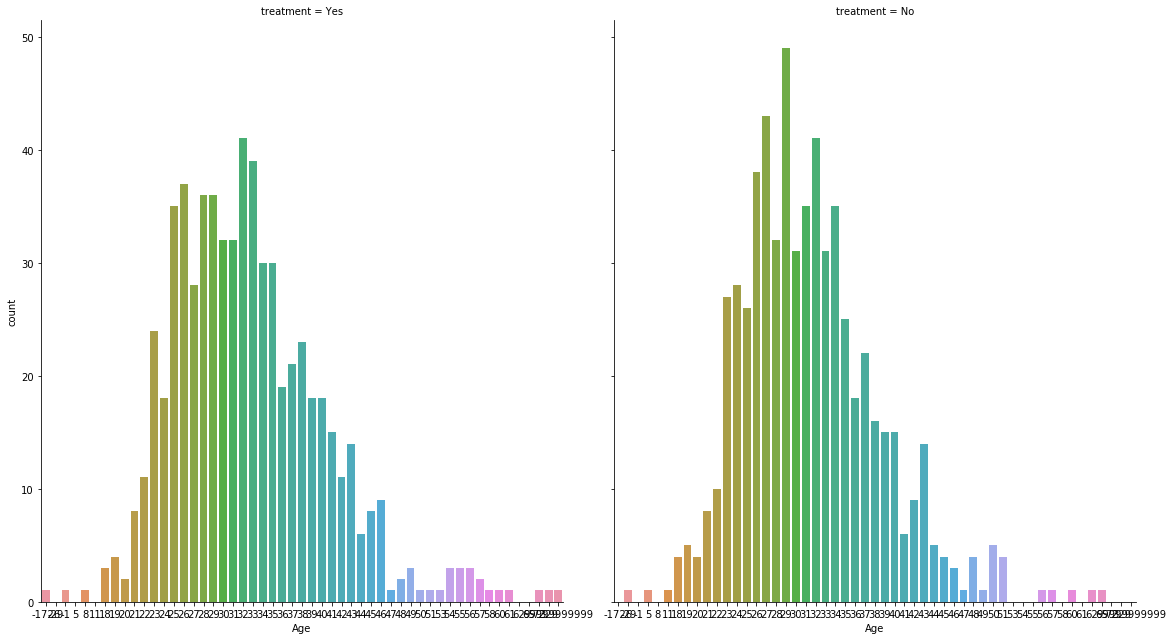

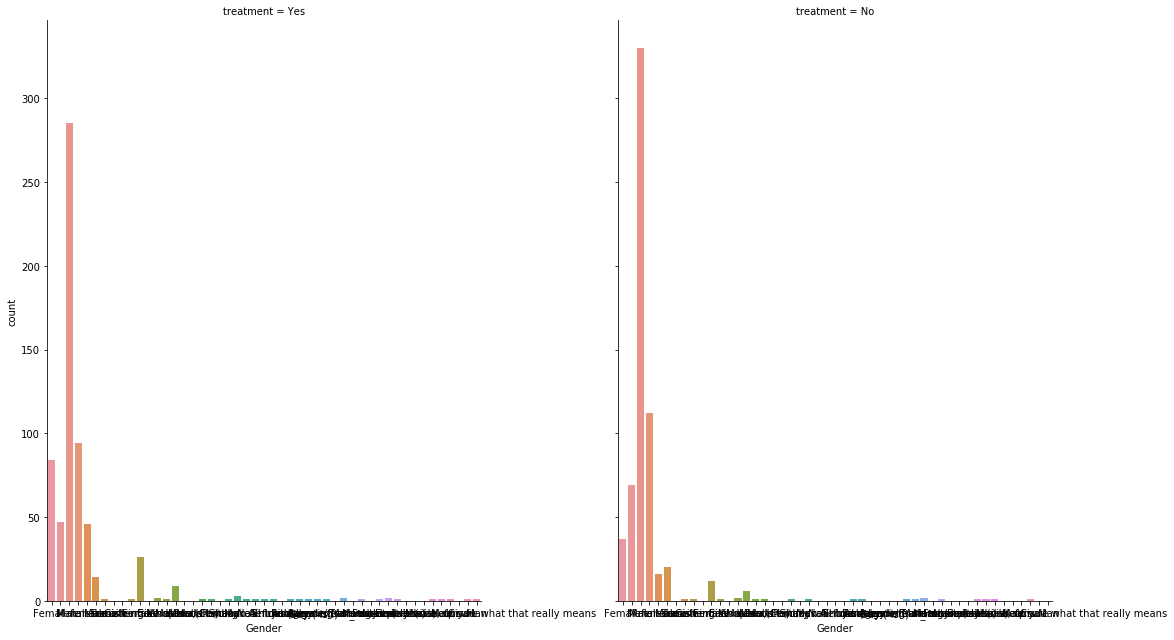

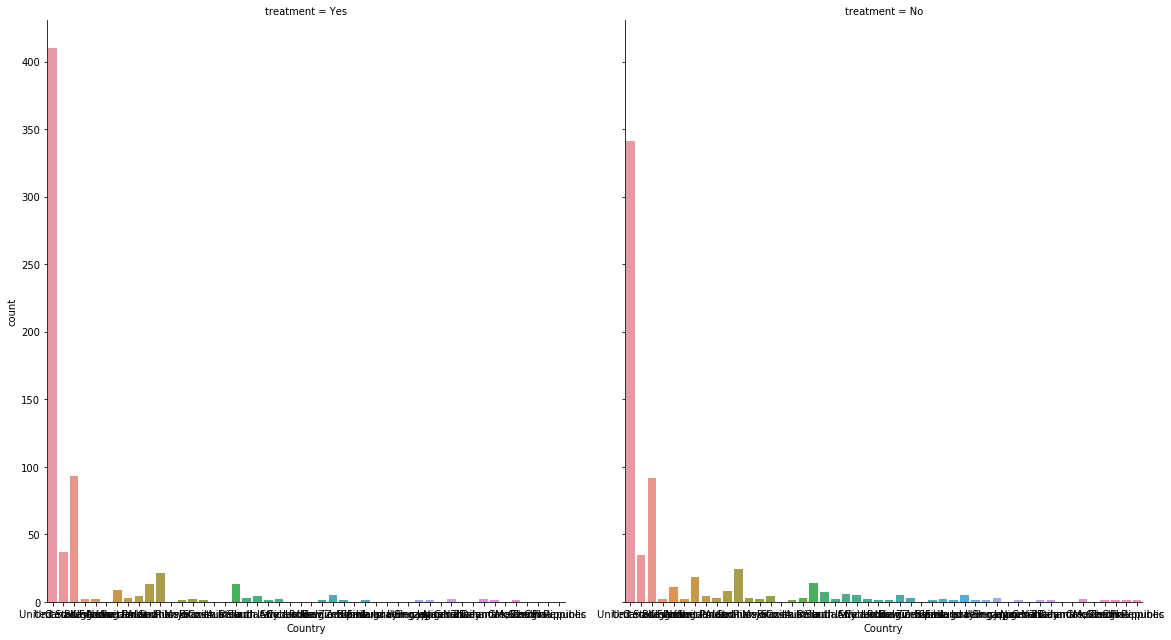

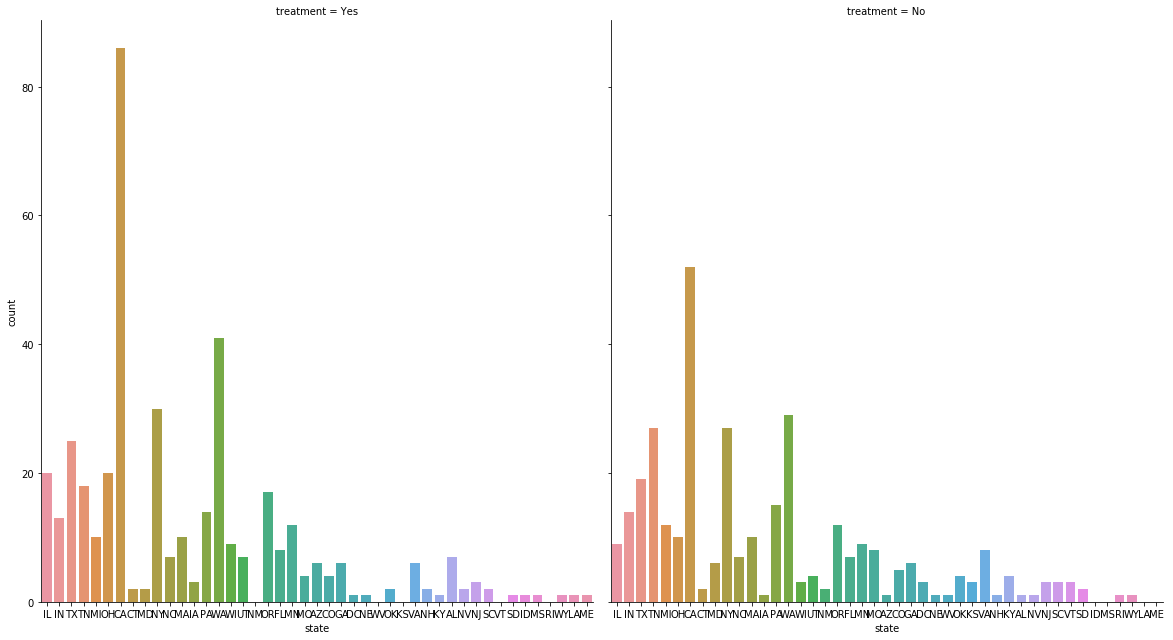

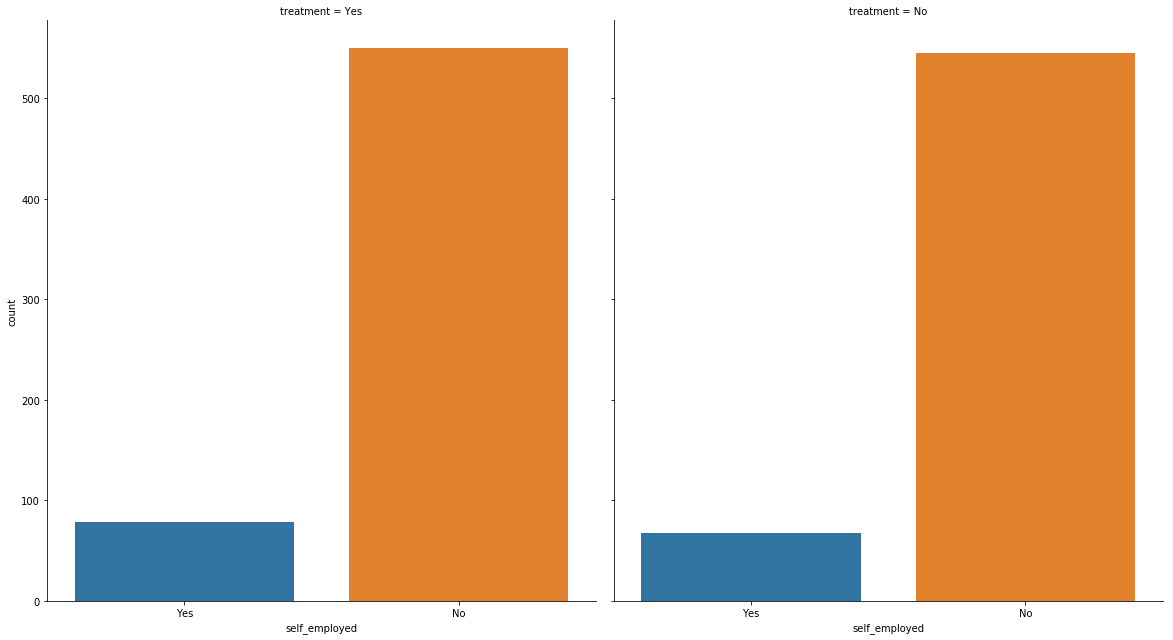

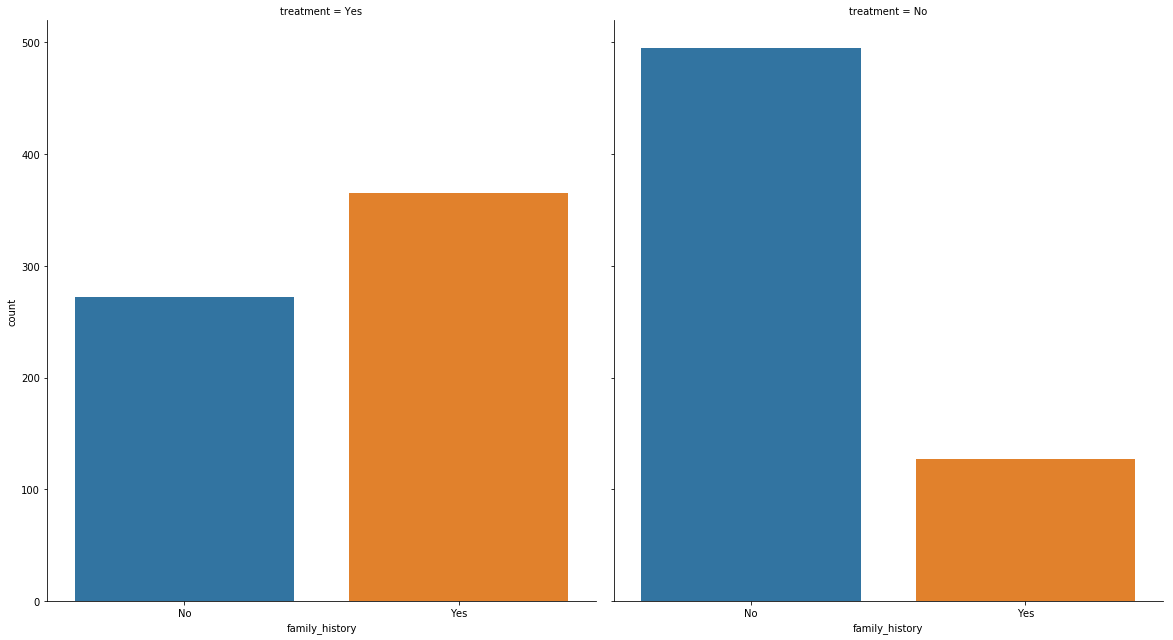

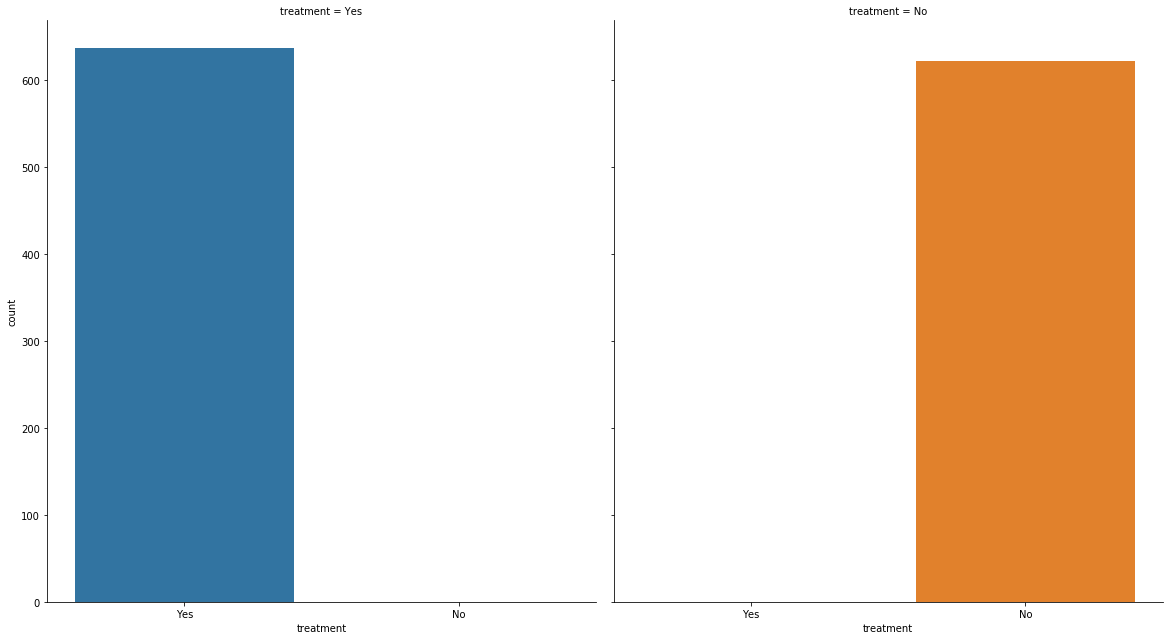

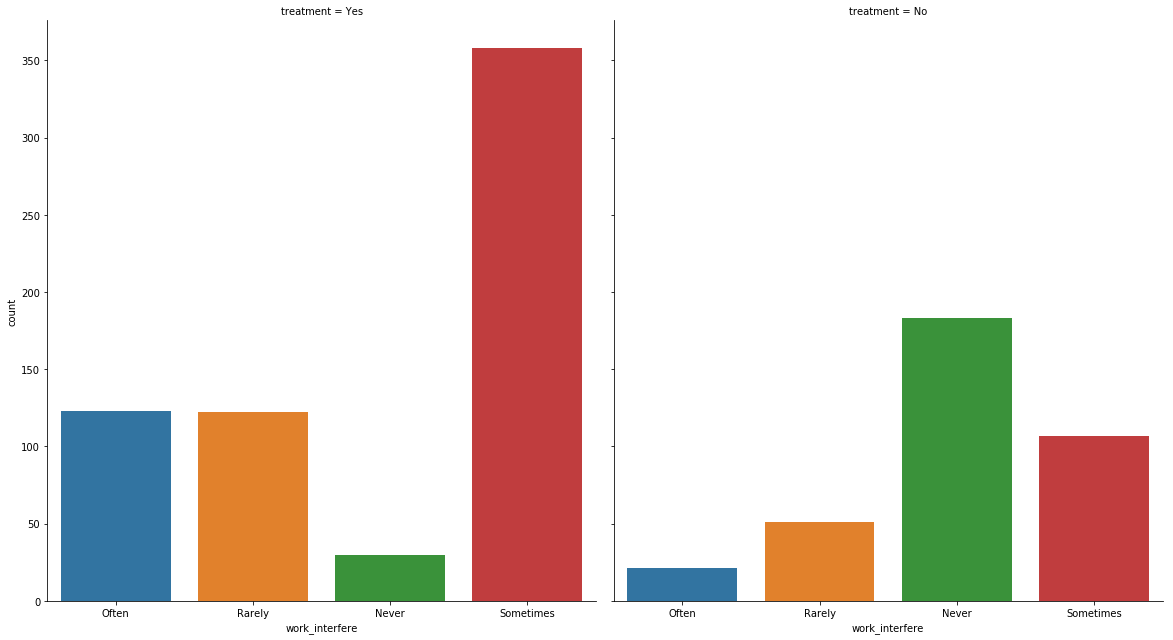

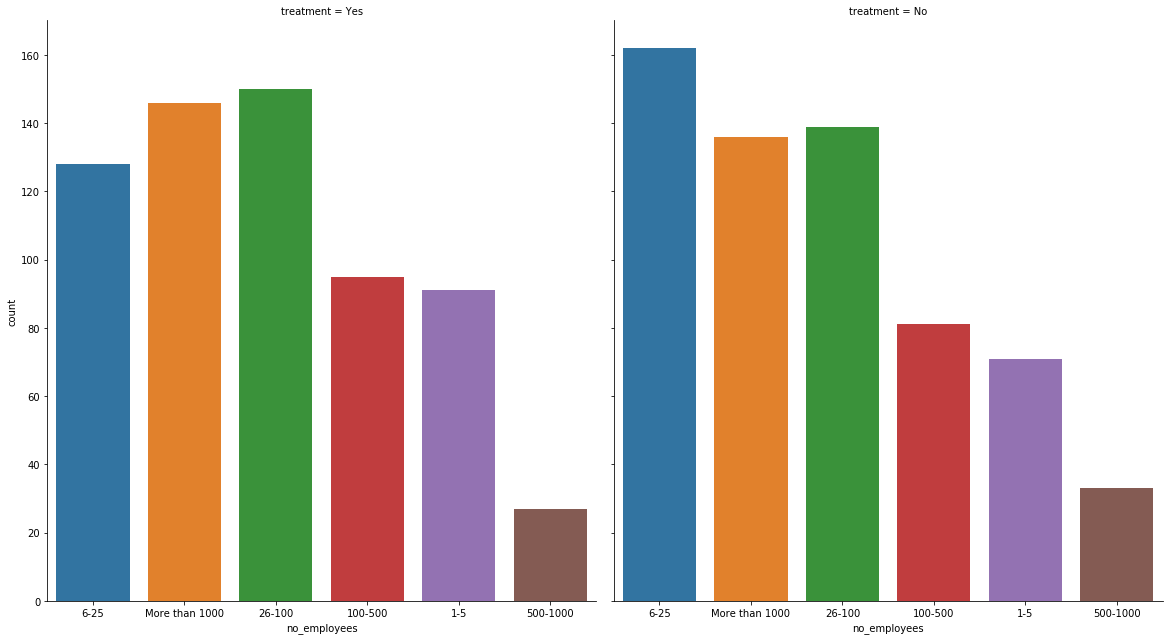

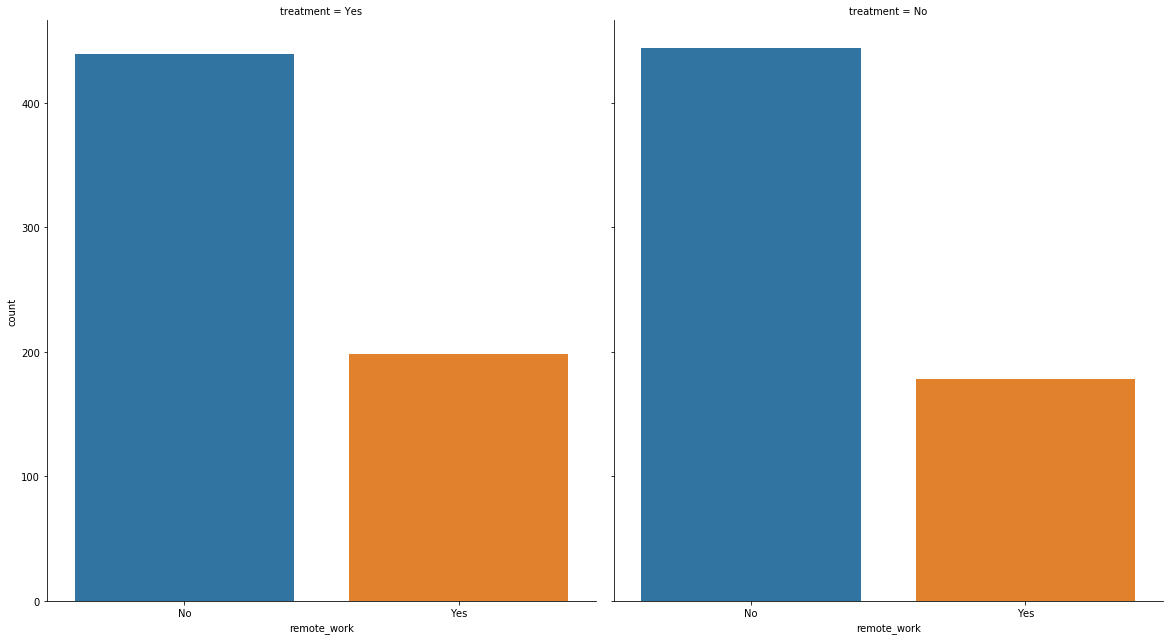

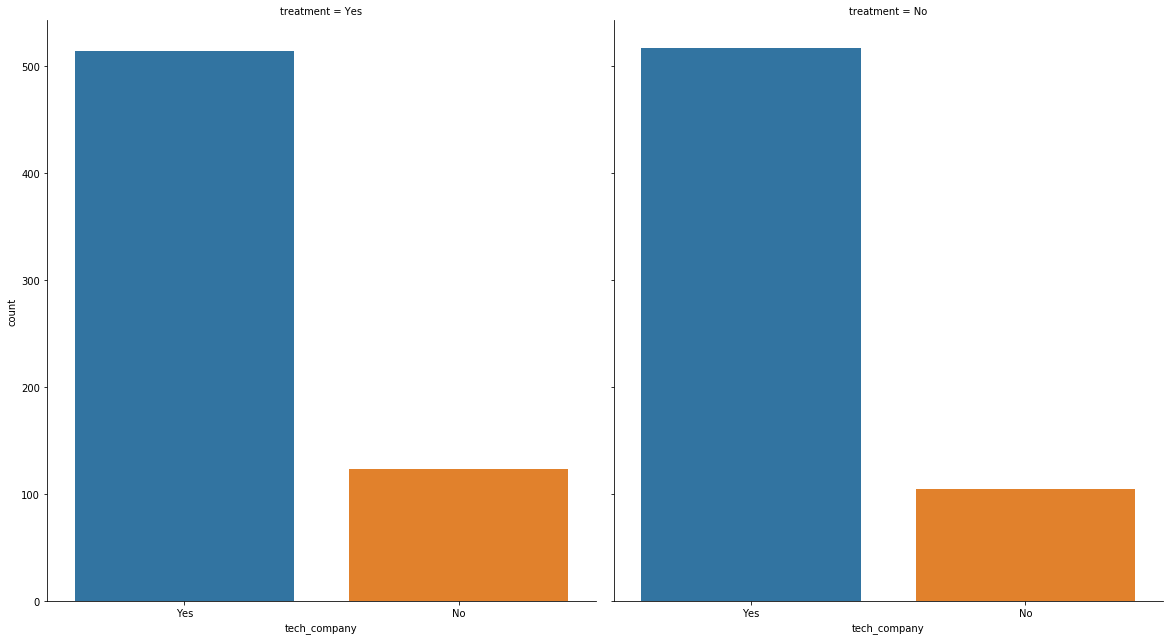

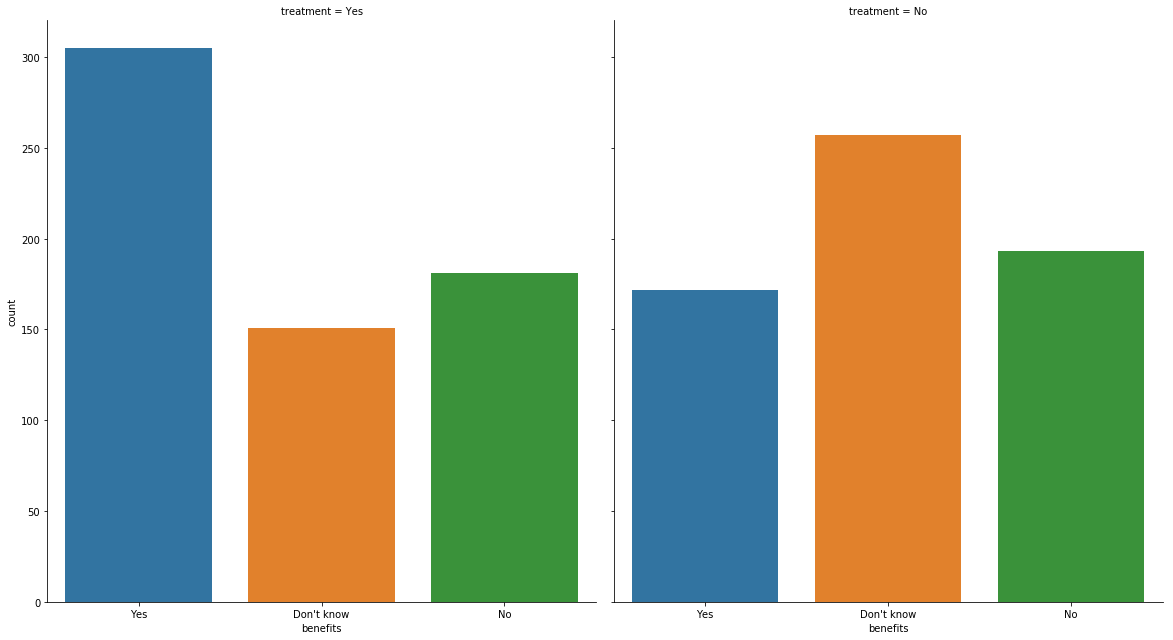

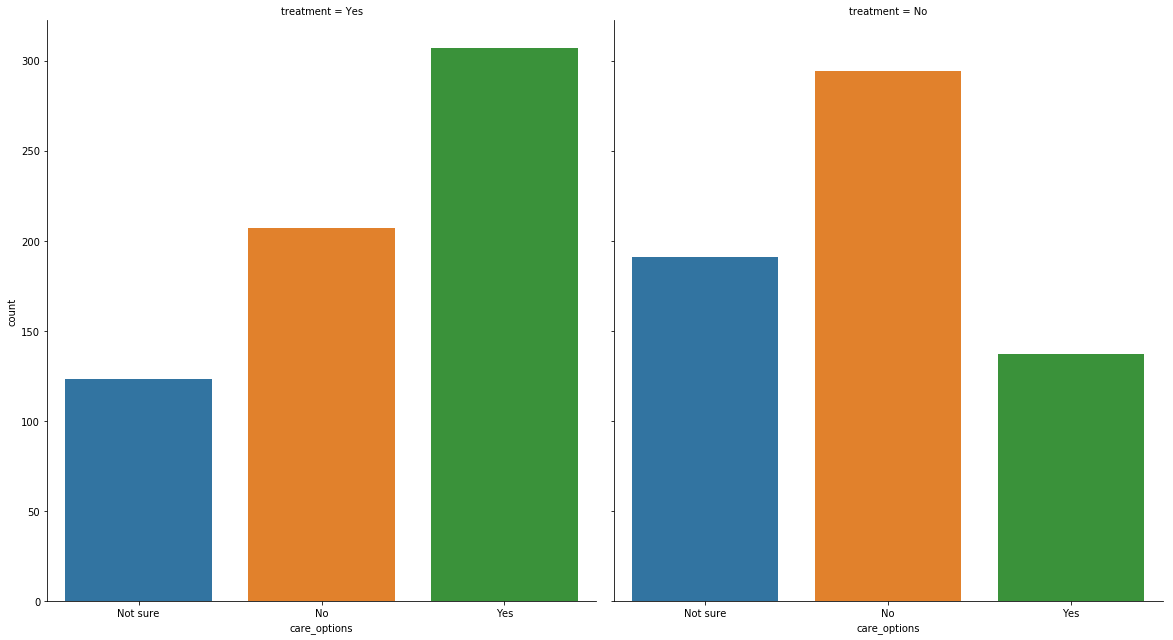

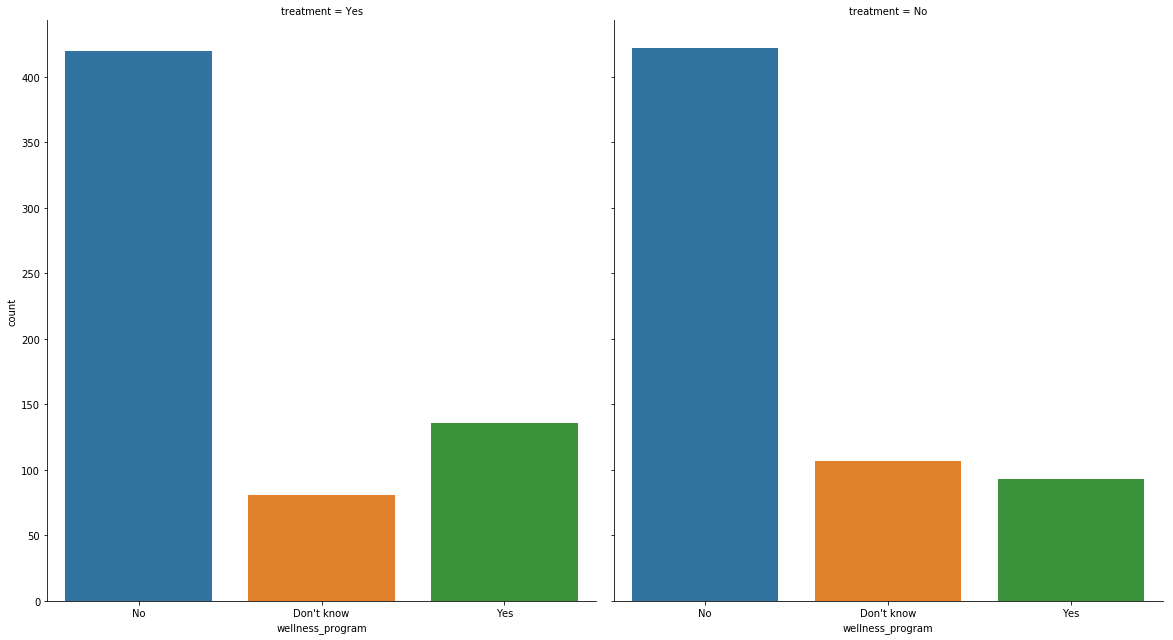

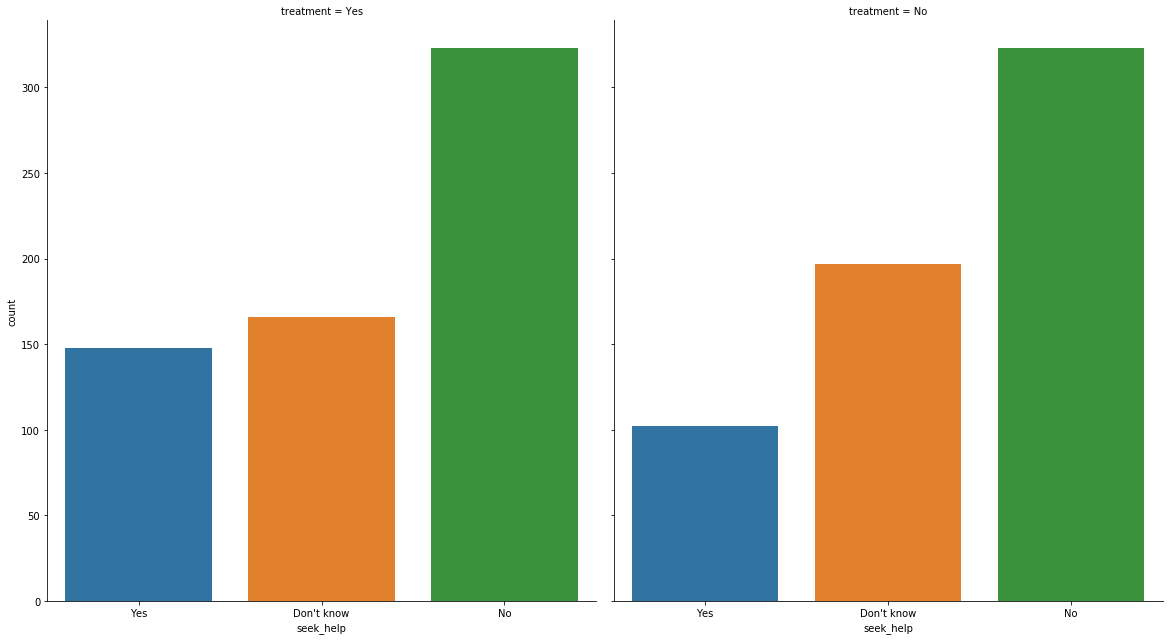

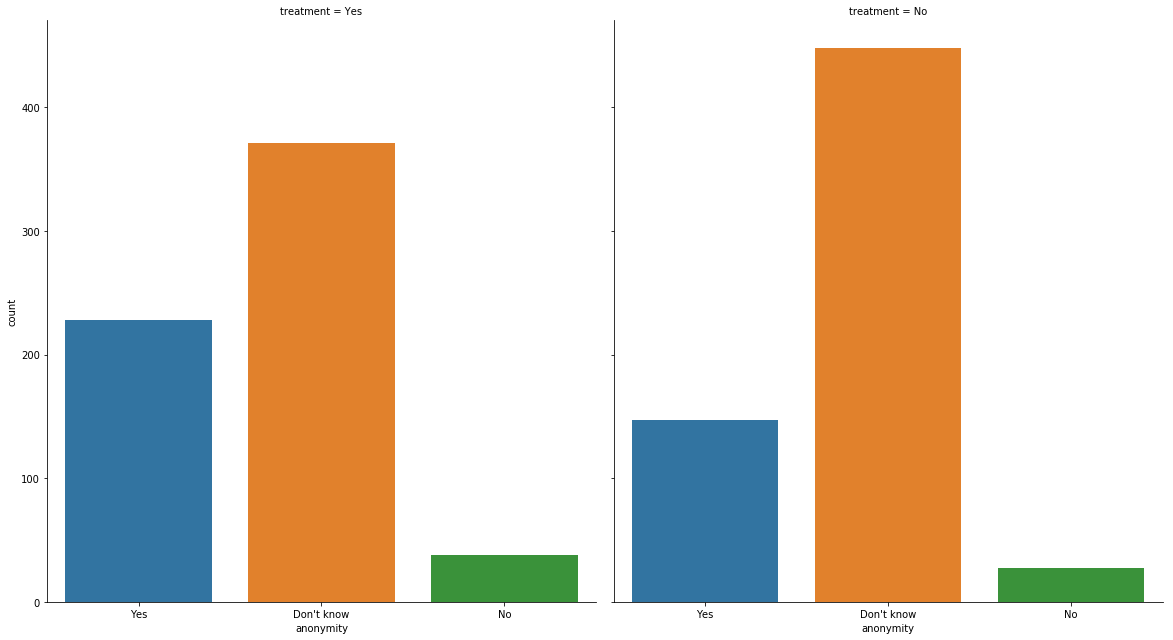

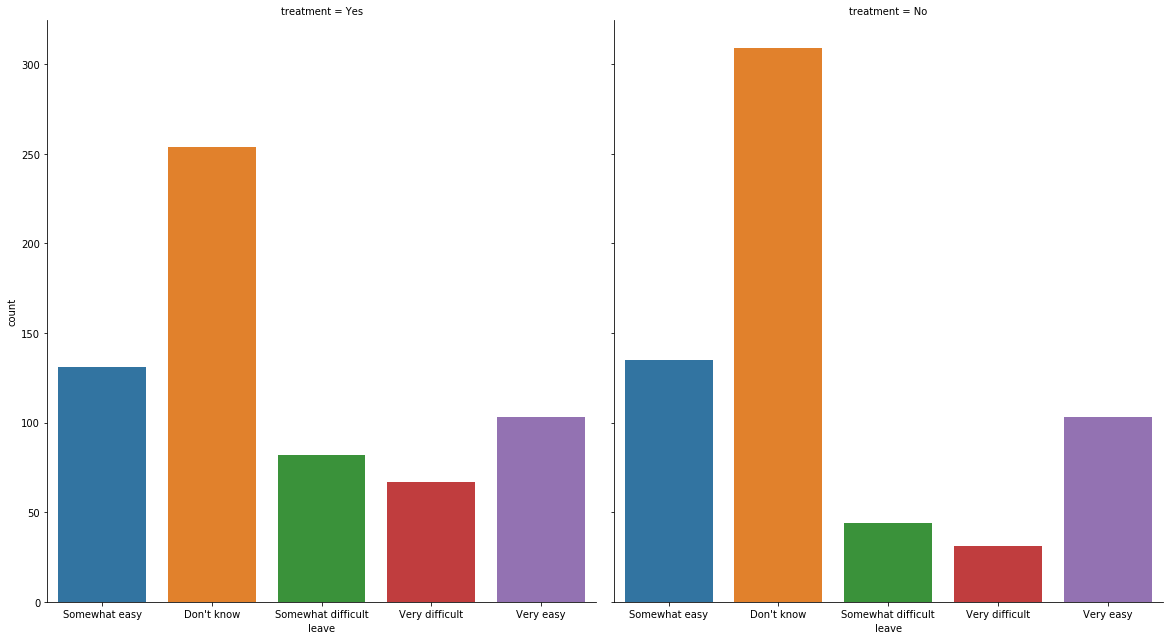

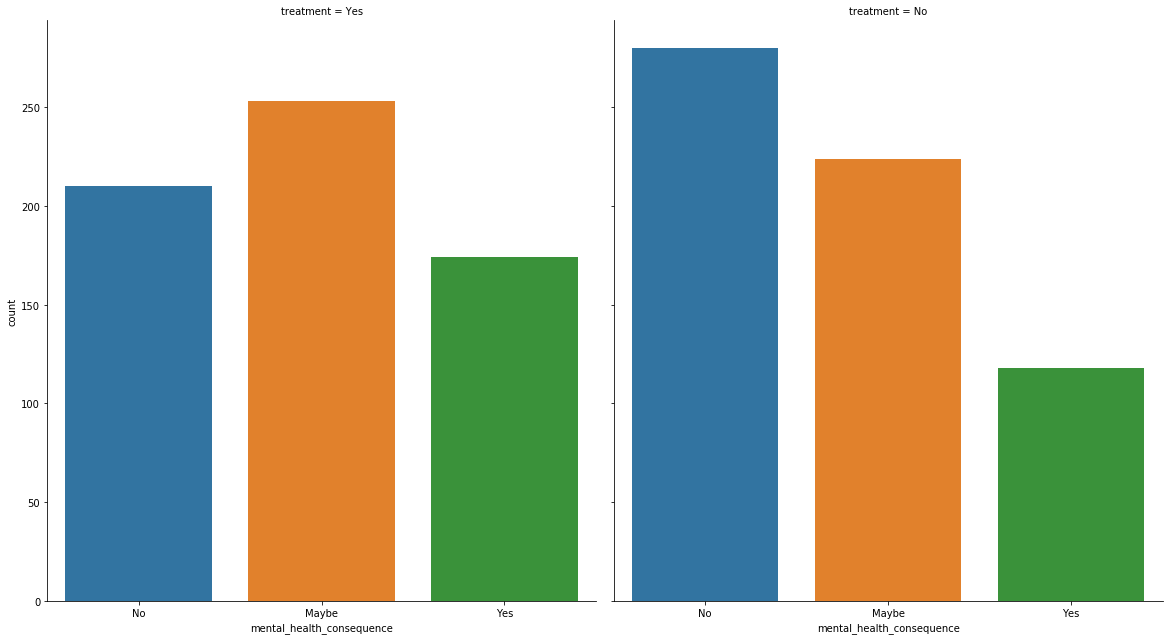

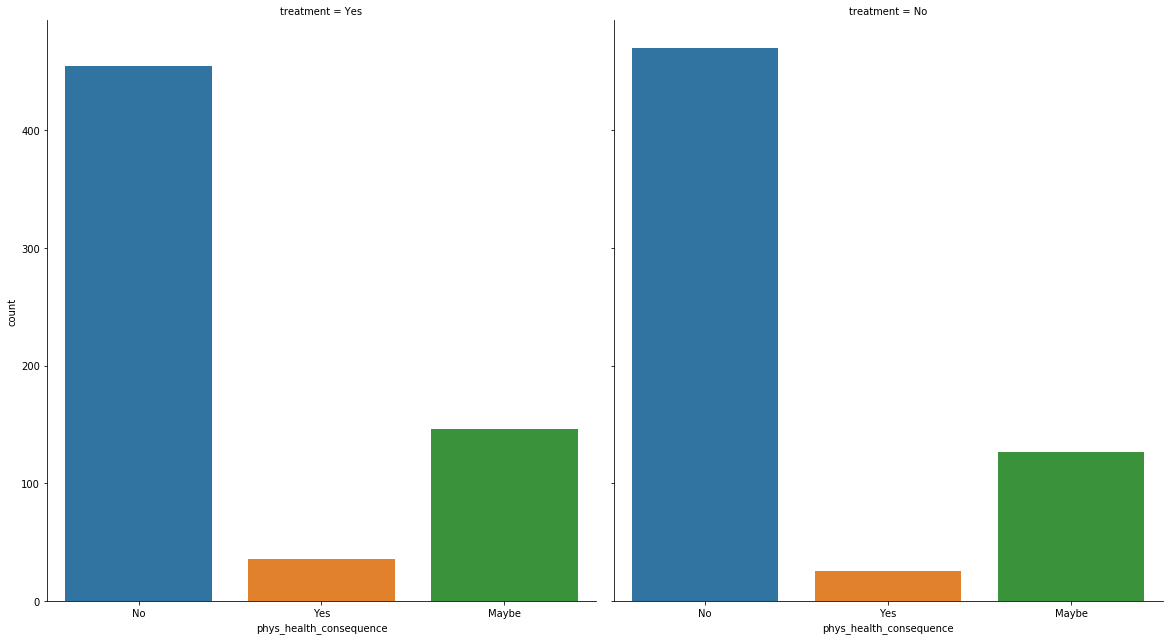

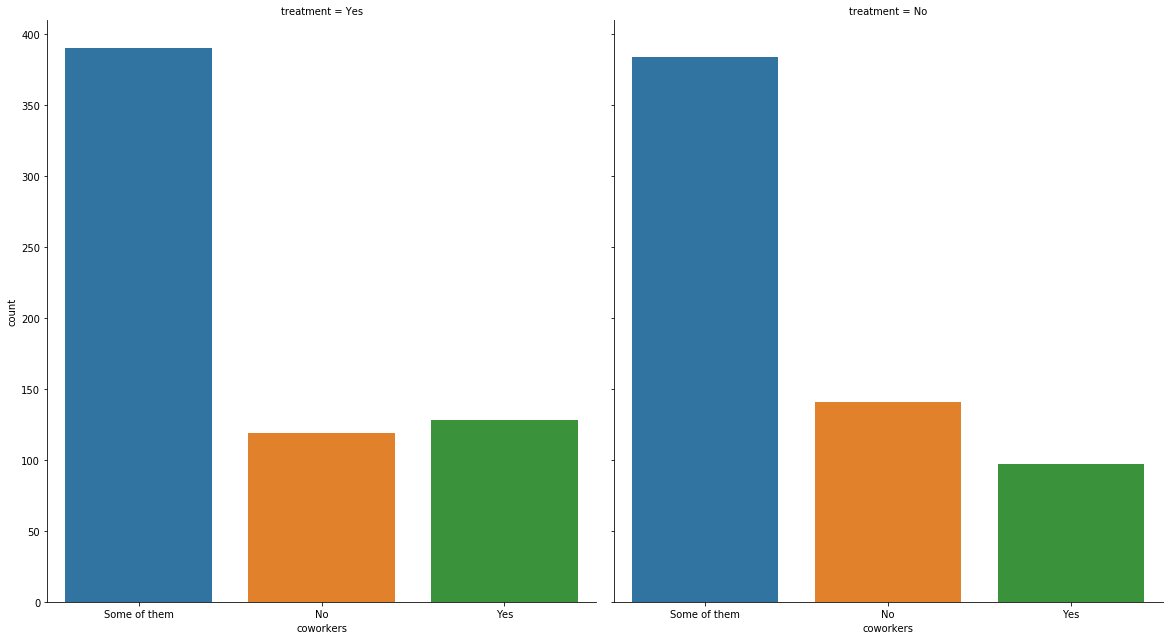

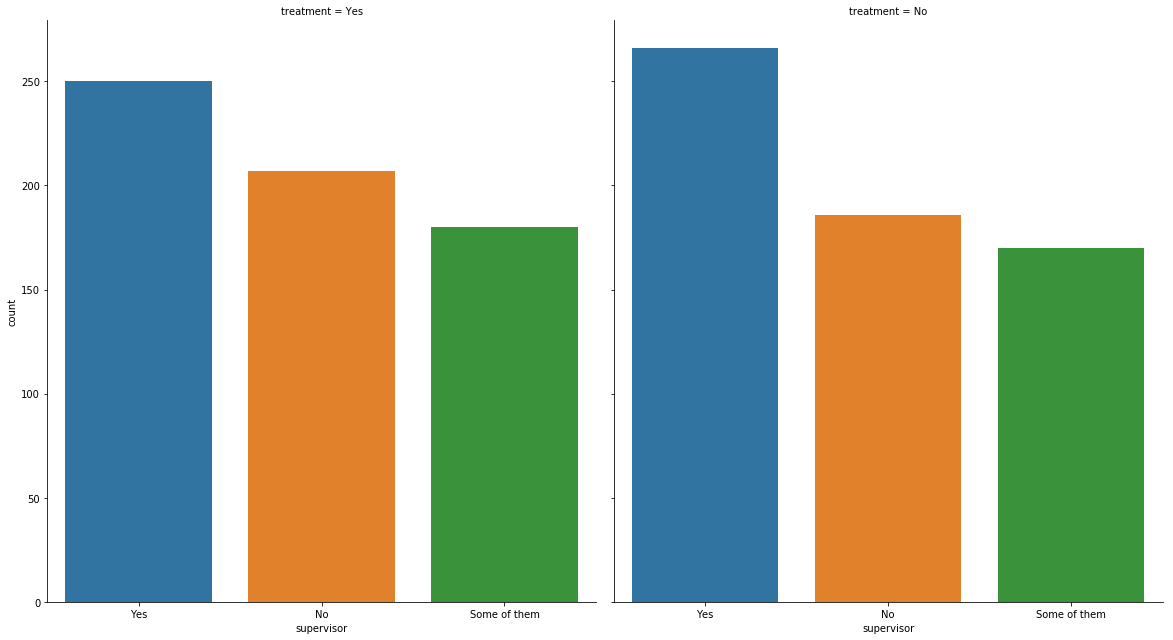

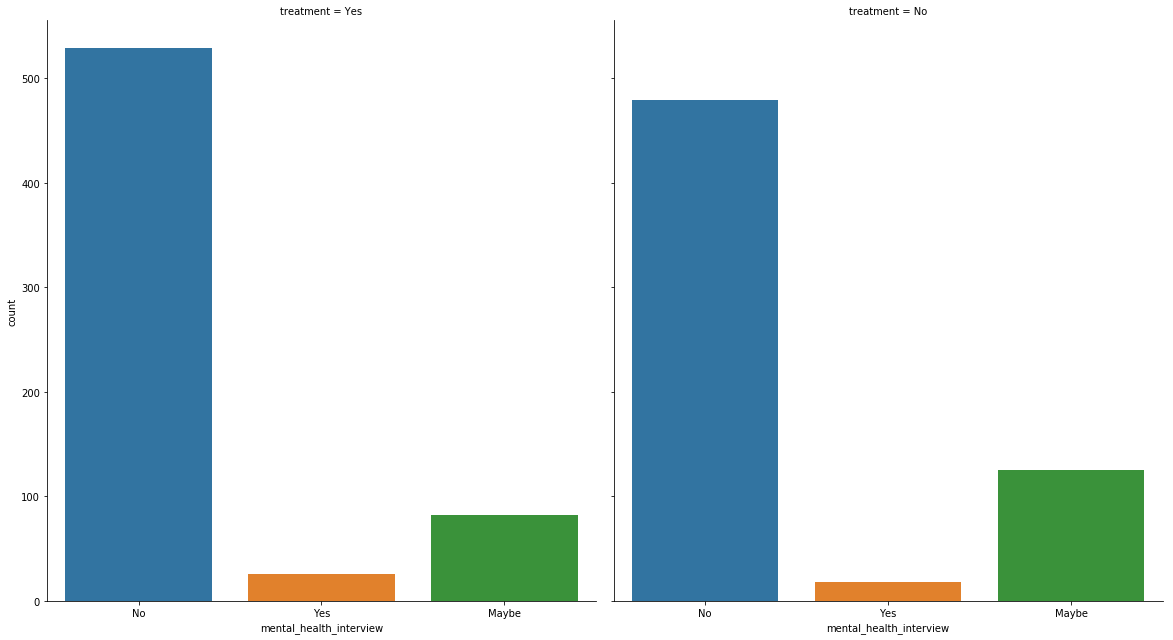

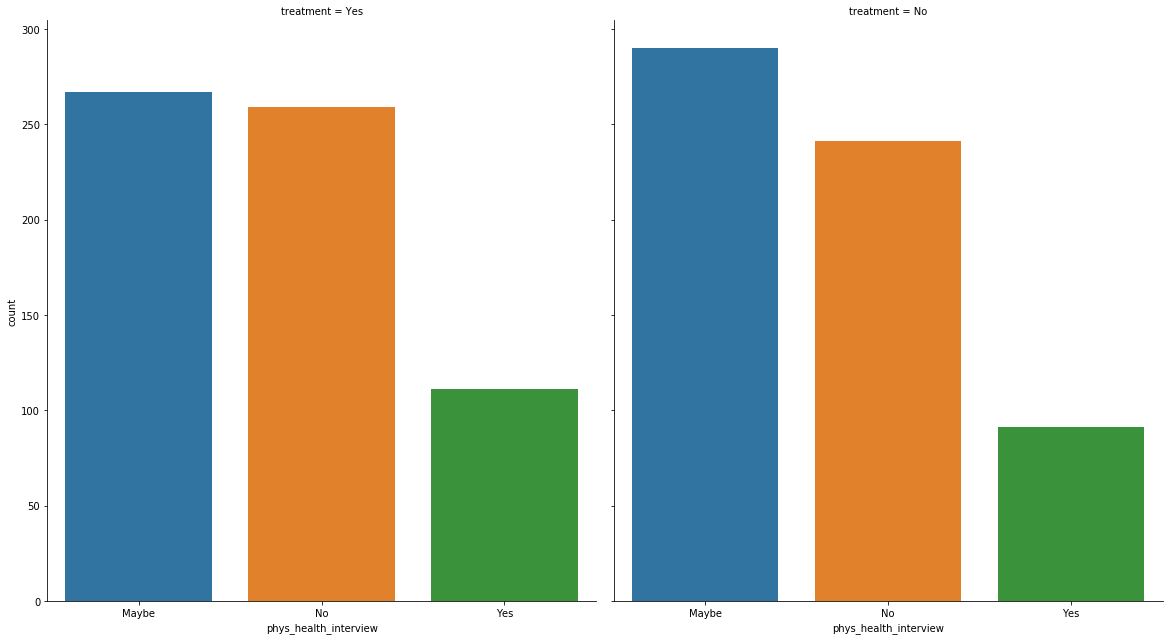

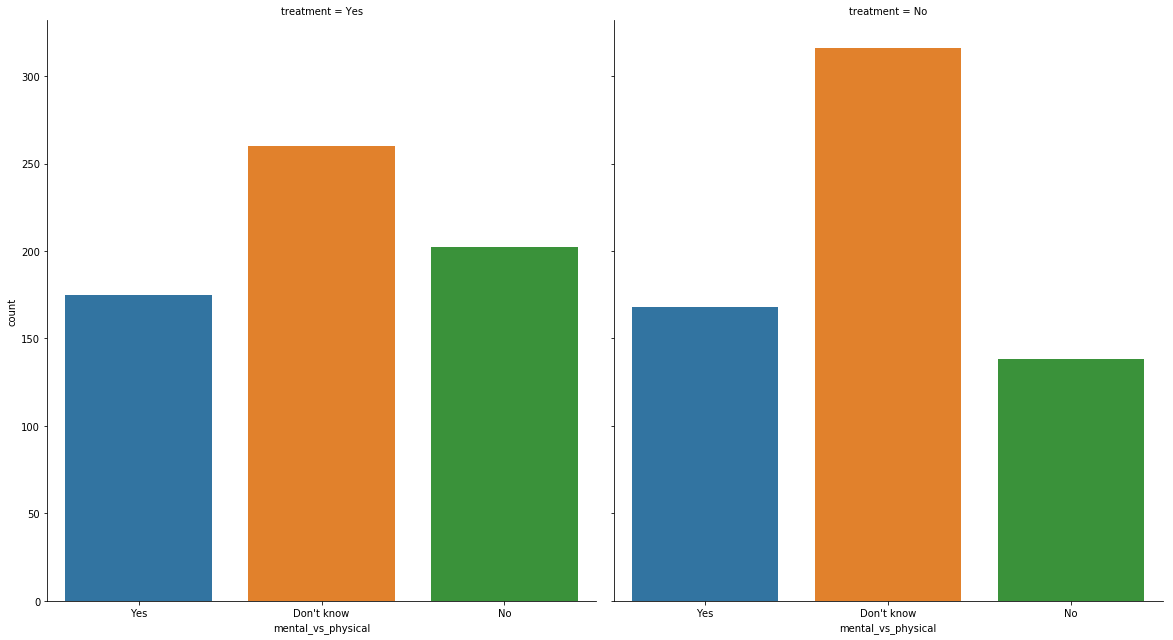

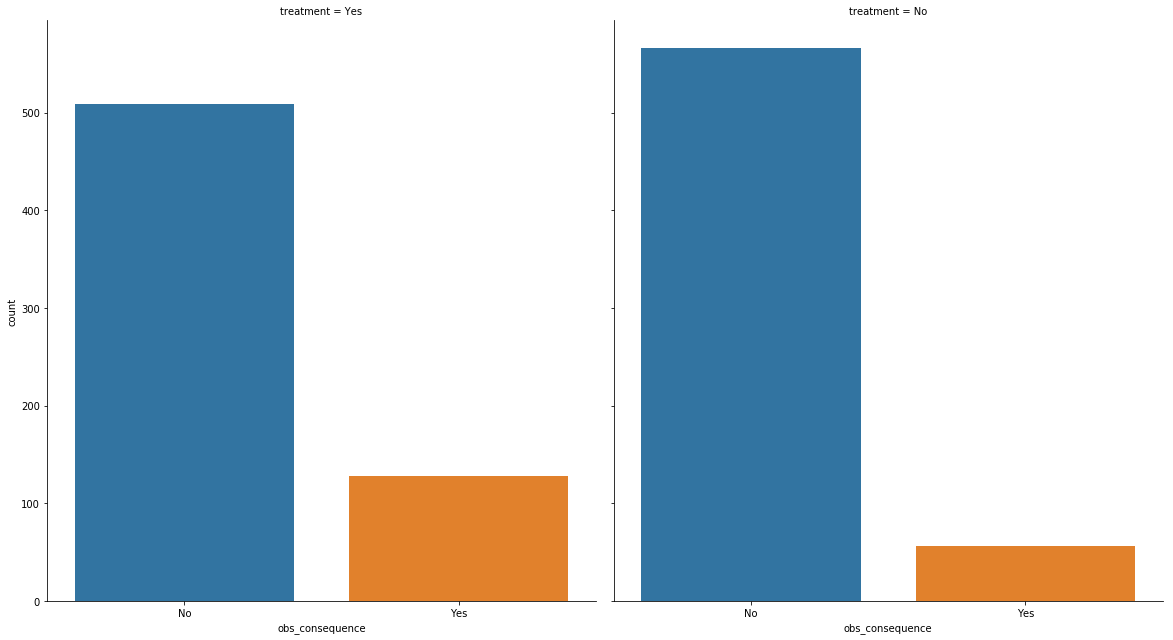

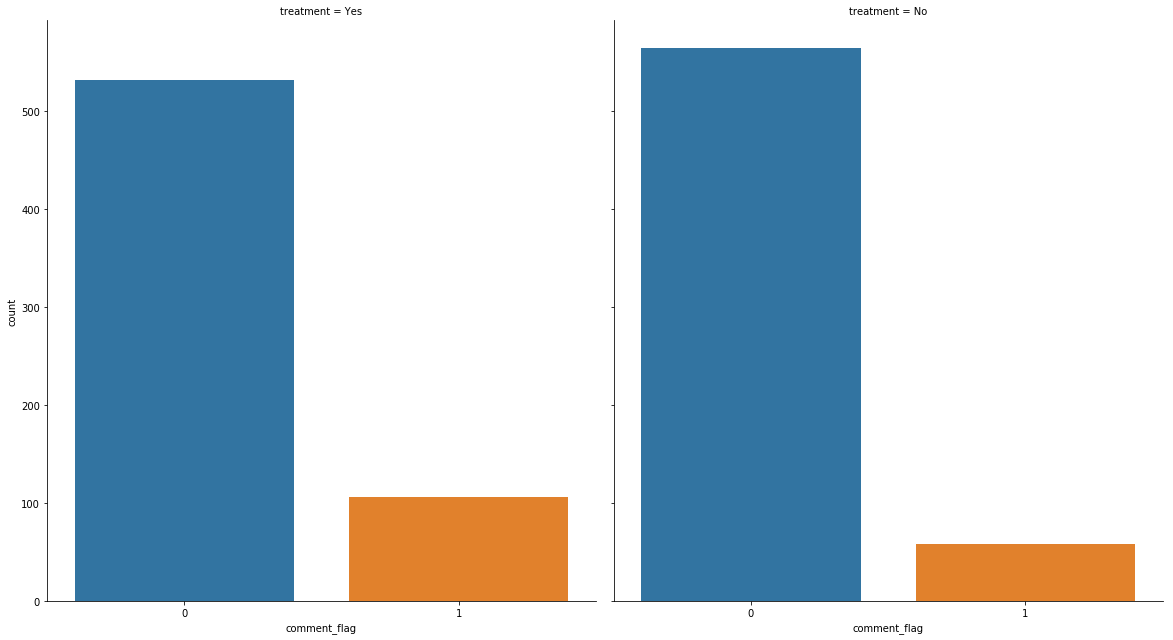

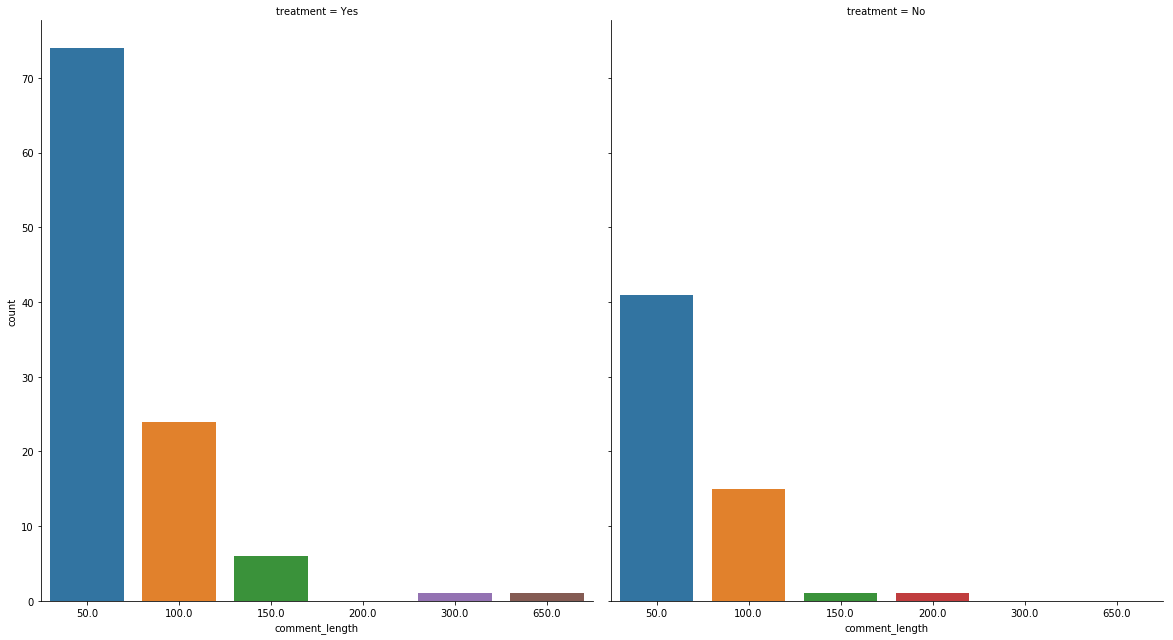

In [14]:
df = df.drop(['comments', 'Timestamp'], axis=1)
for column in df.columns.values:
    sns.factorplot(column, col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [15]:
for index,age in enumerate(df["Age"]):
    if age <= 0:
        df["Age"][index] = -10
    elif age > 0 and age < 10:
        df["Age"][index] = 0
    elif age >=10 and age < 20:
        df["Age"][index] = 10
    elif age >=20 and age < 30:
        df["Age"][index] = 20
    elif age >=30 and age < 40:
        df["Age"][index] = 30
    elif age >=40 and age < 50:
        df["Age"][index] = 40
    elif age >=50 and age < 60:
        df["Age"][index] = 50
    elif age >=60 and age < 70:
        df["Age"][index] = 60
    elif age >=70 and age < 80:
        df["Age"][index] = 70
    elif age >=80 and age < 90:
        df["Age"][index] = 80
    elif age >=90 and age < 100:
        df["Age"][index] = 90
    else:
        df["Age"][index] = 100

df["Age"]

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is

0       30
1       40
2       30
3       30
4       30
5       30
6       30
7       30
8       40
9       20
10      30
11      20
12      40
13      30
14      20
15      20
16      20
17      30
18      40
19      30
20      20
21      30
22      40
23      40
24      30
25      30
26      30
27      30
28      30
29      30
        ..
1229    30
1230    20
1231    20
1232    20
1233    20
1234    20
1235    20
1236    60
1237    20
1238    20
1239    30
1240    30
1241    30
1242    20
1243    40
1244    30
1245    20
1246    30
1247    30
1248    40
1249    30
1250    30
1251    30
1252    20
1253    30
1254    20
1255    30
1256    30
1257    40
1258    20
Name: Age, dtype: int64

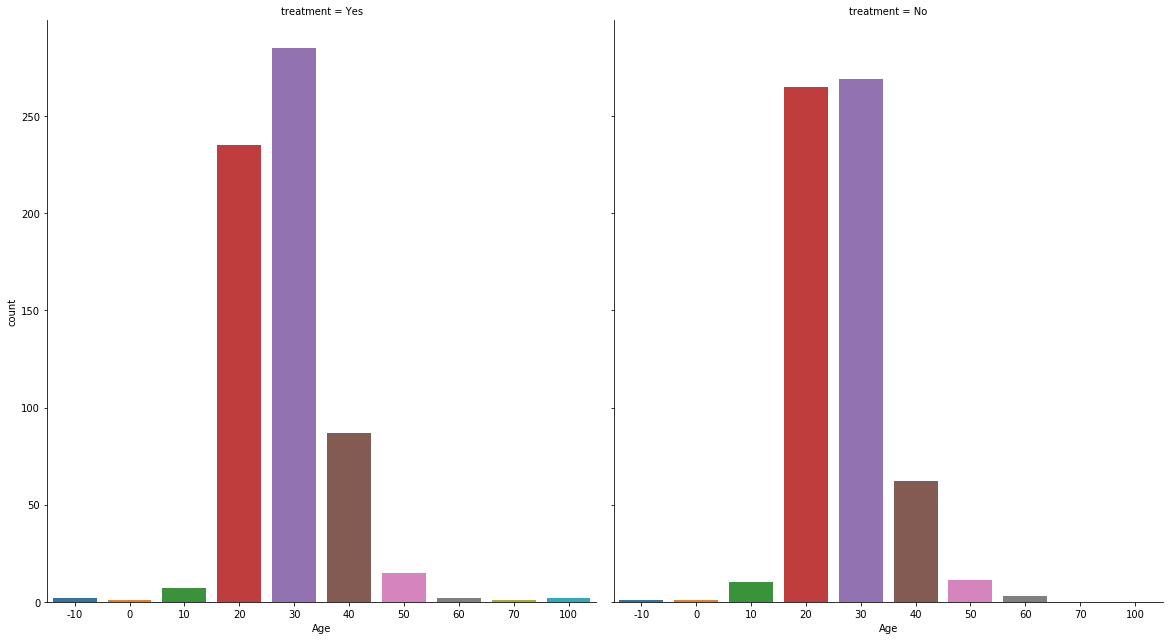

In [16]:
sns.factorplot(df.columns[0], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [17]:
# Genderの名寄せ
col = "Gender"
df[col].replace("All","all", inplace=True)
df_gender = pd.crosstab(index=df["treatment"], columns=df[col], margins=True)
display(df_gender.T.sort_values("All",ascending=False))

treatment                                        No  Yes   All
Gender                                                        
All                                             622  637  1259
Male                                            330  285   615
male                                            112   94   206
Female                                           37   84   121
M                                                69   47   116
female                                           16   46    62
F                                                12   26    38
m                                                20   14    34
f                                                 6    9    15
Make                                              1    3     4
Male                                              1    2     3
Woman                                             2    1     3
Female (trans)                                    0    2     2
Cis Male                                          0    2     2
Man                                               2    0     2
Female                                            1    1     2
non-binary                                        0    1     1
cis-female/femme                                  0    1     1
p                                                 0    1     1
femail                                            1    0     1
fluid                                             0    1     1
maile                                             1    0     1
ostensibly male, unsure what that really means    0    1     1
woman                                             0    1     1
something kinda male?                             1    0     1
queer                                             0    1     1
male leaning androgynous                          1    0     1
cis male                                          1    0     1
msle                                              1    0     1
queer/she/they                                    0    1     1
A little about you                                0    1     1
all                                               0    1     1
Guy (-ish) ^_^                                    0    1     1
Androgyne                                         0    1     1
Cis Female                                        0    1     1
Cis Man                                           0    1     1
Enby                                              0    1     1
Femake                                            1    0     1
Female (cis)                                      1    0     1
Genderqueer                                       1    0     1
Mail                                              1    0     1
Trans-female                                      1    0     1
Mal                                               1    0     1
Male (CIS)                                        1    0     1
Male-ish                                          0    1     1
Malr                                              0    1     1
Agender                                           0    1     1
Neuter                                            0    1     1
Trans woman                                       0    1     1
Nah                                               0    1     1

In [18]:
encode_rule = {
    "Male":"Male",
    "Male ": "Male",
    "Female":"Female",
    "Female ": "Female",
    "male":"Male",
    "female":"Female",
    "M":"Male",
    "m": "Male",
    "F":"Female",
    "f": "Female",
    "Make": "Male",
    "Mail": "Male",
    "Malr": "Male",
    "Mal": "Male",
    "Femake": "Female",
    "msle": "Male",
    "woman": "Female",
    "femail": "Female",
    "maile": "Male",
    "Woman": "Female",
    "Man": "Male",
#    "Female (trans)": "non-binary",
#    "Cis Male": "non-binary",
#    "non-binary": "non-binary",
#    "cis-female/femme": "non-binary",
#    "fluid": "non-binary",
#    "ostensibly male, unsure what that really means": "non-binary",
#    "something kinda male?": "non-binary",
#    "queer": "non-binary",
#    "male leaning androgynous": "non-binary",
#    "cis male": "non-binary",
#    "queer/she/they": "non-binary",
#    "all": "non-binary",
#    "Guy (-ish) ^_^": "non-binary",
#    "Androgyne": "non-binary",
#    "Cis Female": "non-binary",
#    "Cis Man": "non-binary",
#    "Female (cis)": "non-binary",
#    "Genderqueer": "non-binary",
#    "Trans-female": "non-binary",
#    "Male (CIS)": "non-binary",
#    "Male-ish": "non-binary",
#    "Agender": "non-binary",
#    "Neuter": "non-binary",
#    "Trans woman": "non-binary",
#    "Nah": "non-binary",
#    "Enby": "non-binary",
#    "p": "non-binary",
#    "A little about you": "non-binary"
}
df["Gender_enc"] = df["Gender"].map(encode_rule)

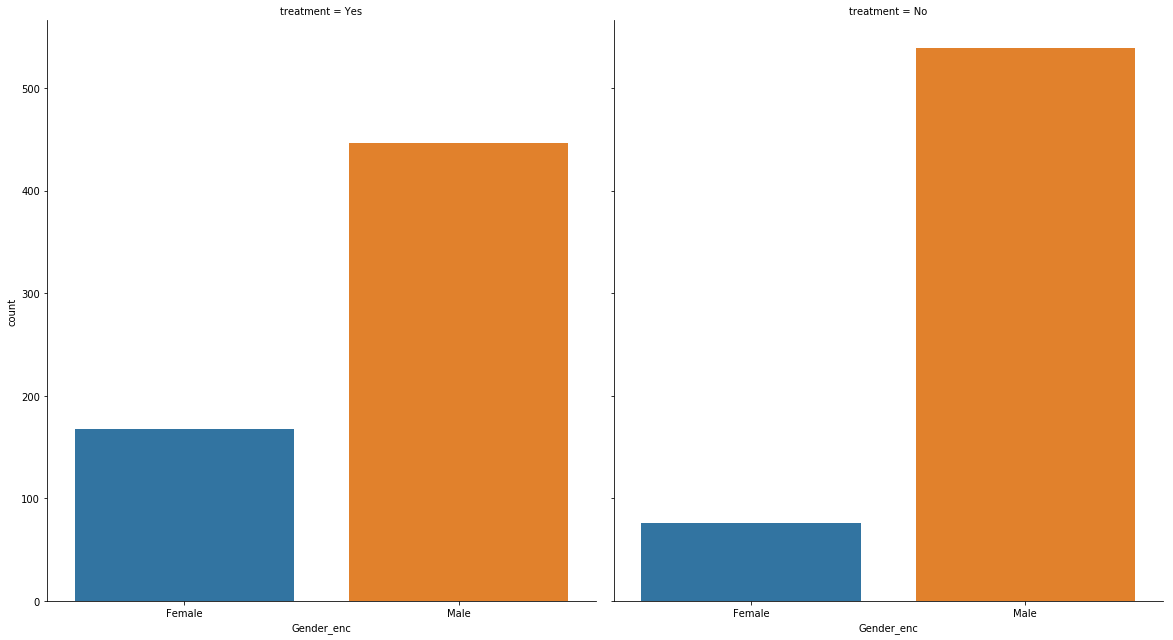

In [19]:
sns.factorplot(df.columns[27], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [20]:
df["Gender_enc2"] = df["Gender"].copy()
df["Gender_enc2"].replace("male","Male", inplace=True)
df["Gender_enc2"].replace("female","Female", inplace=True)
df["Gender_enc2"].replace("Make","Male", inplace=True)
df["Gender_enc2"].replace("Malr","Male", inplace=True)
df["Gender_enc2"].replace("Femake","Female", inplace=True)
df["Gender_enc2"].replace("msle","Male", inplace=True)
df["Gender_enc2"].replace("woman","Female", inplace=True)
df["Gender_enc2"].replace("Woman","Female", inplace=True)
df["Gender_enc2"].replace("Man","Male", inplace=True)
df["Gender_enc2"].replace("Woman","Female", inplace=True)
df["Gender_enc2"].replace("M","Male", inplace=True)
df["Gender_enc2"].replace("m","Male", inplace=True)
df["Gender_enc2"].replace("F","Female", inplace=True)
df["Gender_enc2"].replace("f","Female", inplace=True)
df["Gender_enc2"].replace("Mail","Male", inplace=True)
df["Gender_enc2"].replace("Mal","Male", inplace=True)
df["Gender_enc2"].replace("femail","Female", inplace=True)
df["Gender_enc2"].replace("maile","Male", inplace=True)

In [21]:
df["Gender_enc3"] = df["Gender_enc2"].copy()

for index,gender in enumerate(df["Gender_enc3"]):
    if gender == "Female" or gender == "Male":
        del df["Gender_enc3"][index]


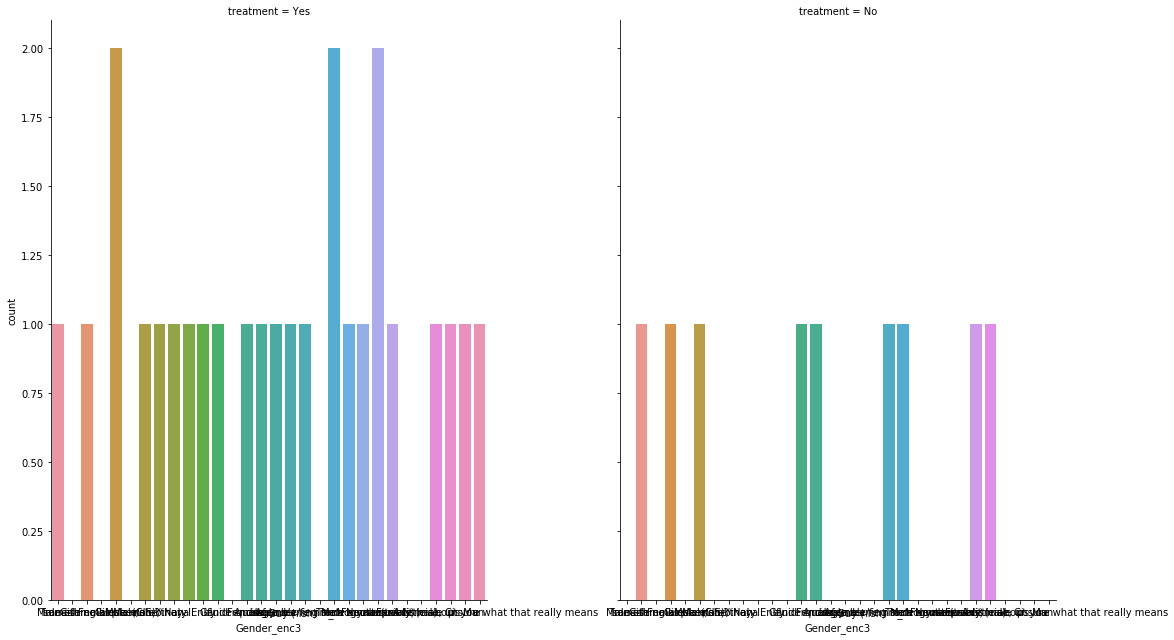

In [22]:
sns.factorplot(df.columns[29], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [23]:
encode_rule = {
    "Male":"Male",
    "Male ": "Male",
    "Female":"Female",
    "Female ": "Female",
    "male":"Male",
    "female":"Female",
    "M":"Male",
    "m": "Male",
    "F":"Female",
    "f": "Female",
    "Make": "Male",
    "Mail": "Male",
    "Malr": "Male",
    "Mal": "Male",
    "Femake": "Female",
    "msle": "Male",
    "woman": "Female",
    "femail": "Female",
    "maile": "Male",
    "Woman": "Female",
    "Man": "Male",
    "Female (trans)": "non-binary",
    "Cis Male": "non-binary",
    "non-binary": "non-binary",
    "cis-female/femme": "non-binary",
    "fluid": "non-binary",
    "ostensibly male, unsure what that really means": "non-binary",
    "something kinda male?": "non-binary",
    "queer": "non-binary",
    "male leaning androgynous": "non-binary",
    "cis male": "non-binary",
    "queer/she/they": "non-binary",
    "all": "non-binary",
    "Guy (-ish) ^_^": "non-binary",
    "Androgyne": "non-binary",
    "Cis Female": "non-binary",
    "Cis Man": "non-binary",
    "Female (cis)": "non-binary",
    "Genderqueer": "non-binary",
    "Trans-female": "non-binary",
    "Male (CIS)": "non-binary",
    "Male-ish": "non-binary",
    "Agender": "non-binary",
    "Neuter": "non-binary",
    "Trans woman": "non-binary",
    "Nah": "non-binary",
    "Enby": "non-binary",
    "p": "non-binary",
    "A little about you": "non-binary"
}
df["Gender_enc4"] = df["Gender"].map(encode_rule)

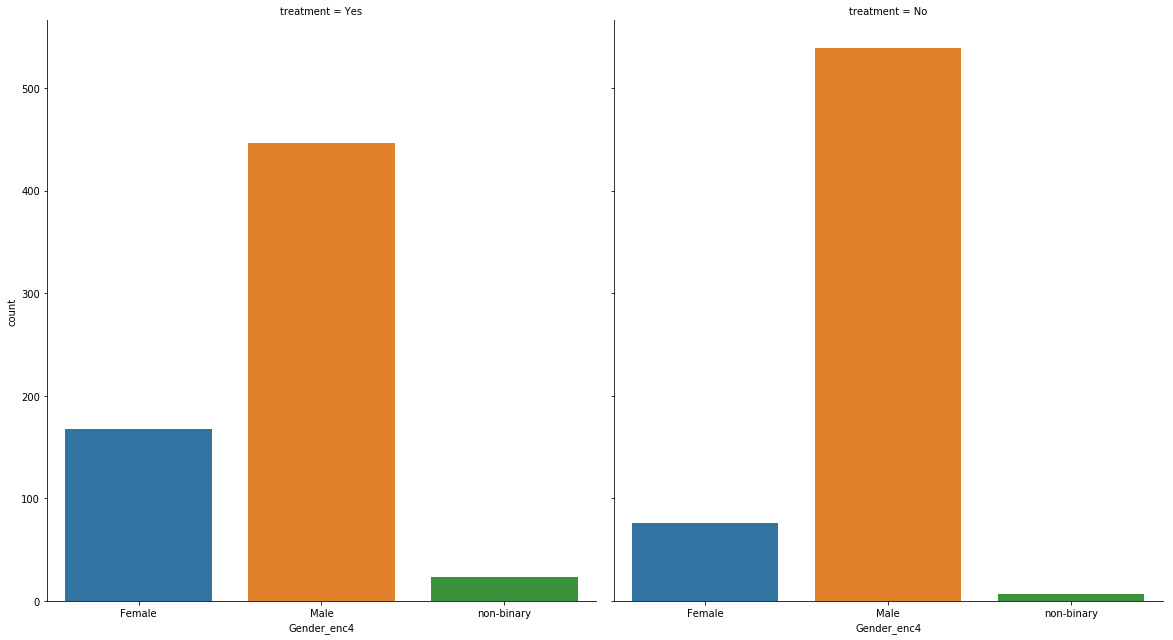

In [24]:
sns.factorplot(df.columns[30], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [25]:
!pip install lightning-python

    100% |████████████████████████████████| 522kB 1.6MB/s ta 0:00:01
  Running setup.py bdist_wheel for lightning-python ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/49/74/72/341c3f2a6093a7c3aaa700368e1d031665e2b4e4ba17091fc1
Successfully built lightning-python
pyasn1-modules 0.2.2 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.
msrest 0.5.4 has requirement requests~=2.16, but you'll have requests 2.14.2 which is incompatible.
azure-cli-interactive 0.3.24 has requirement six~=1.11.0, but you'll have six 1.10.0 which is incompatible.



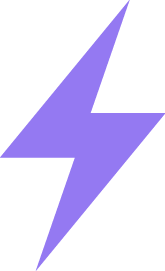

Running local mode, some functionality limited.



In [26]:
from lightning import Lightning

lgn = Lightning(ipython=True, local=True)

In [27]:
countries_encode_rule = {
    "United States": "USA",
    "Canada": "CAN",
    "United Kingdom": "GBR",
    "Bulgaria": "BUL",
    "France": "FRA",
    "Portugal": "POR",
    "Netherlands": "NED",
    "Switzerland": "SUI",
    "Poland": "POL",
    "Australia": "AUS",
    "Germany": "GER",
    "Russia": "RUS",
    "Mexico": "MEX",
    "Brazil": "BRA",
    "Slovenia": "SLO",
    "Costa Rica": "CRC",
    "Austria": "AUT",
    "Ireland": "IRL",
    "India": "IND",
    "South Africa": "RSA",
    "Italy": "ITA",
    "Sweden": "SWE",
    "Colombia": "COL",
    "Latvia": "LAT",
    "Romania": "ROM",
    "Belgium": "BEL",
    "New Zealand": "NZL",
    "Zimbabwe": "ZIM",
    "Spain": "ESP",
    "Finland": "FIN",
    "Uruguay": "URU",
    "Israel": "ISR",
    "Bosnia and Herzegovina": "BIH",
    "Hungary": "HUN",
    "Singapore": "SIN",
    "Japan": "JPN",
    "Nigeria": "NGR",
    "Croatia": "CRO",
    "Norway": "NOR",
    "Thailand": "THA",
    "Denmark": "DEN",
    "Bahamas, The": "BAH",
    "Greece": "GRE",
    "Moldova": "MDA",
    "Georgia": "GEO",
    "China": "CHN",
    "Czech Republic": "CZE",
    "Philippines": "PHI"
}
df["Country_enc"] = df["Country"].map(countries_encode_rule)

In [28]:
import collections
c = collections.Counter(df["Country_enc"])
c

Counter({'AUS': 21,
         'AUT': 3,
         'BAH': 1,
         'BEL': 6,
         'BIH': 1,
         'BRA': 6,
         'BUL': 4,
         'CAN': 72,
         'CHN': 1,
         'COL': 2,
         'CRC': 1,
         'CRO': 2,
         'CZE': 1,
         'DEN': 2,
         'ESP': 1,
         'FIN': 3,
         'FRA': 13,
         'GBR': 185,
         'GEO': 1,
         'GER': 45,
         'GRE': 2,
         'HUN': 1,
         'IND': 10,
         'IRL': 27,
         'ISR': 5,
         'ITA': 7,
         'JPN': 1,
         'LAT': 1,
         'MDA': 1,
         'MEX': 3,
         'NED': 27,
         'NGR': 1,
         'NOR': 1,
         'NZL': 8,
         'PHI': 1,
         'POL': 7,
         'POR': 2,
         'ROM': 1,
         'RSA': 6,
         'RUS': 3,
         'SIN': 4,
         'SLO': 1,
         'SUI': 7,
         'SWE': 7,
         'THA': 1,
         'URU': 1,
         'USA': 751,
         'ZIM': 1})

In [29]:
df["Country_enc"]

0       USA
1       USA
2       CAN
3       GBR
4       USA
5       USA
6       USA
7       CAN
8       USA
9       CAN
10      USA
11      BUL
12      USA
13      USA
14      CAN
15      USA
16      GBR
17      USA
18      USA
19      FRA
20      USA
21      USA
22      USA
23      USA
24      USA
25      USA
26      USA
27      USA
28      USA
29      GBR
       ... 
1229    GRE
1230    GBR
1231    GBR
1232    GBR
1233    GBR
1234    GBR
1235    CAN
1236    USA
1237    IRL
1238    USA
1239    NED
1240    GER
1241    POL
1242    IRL
1243    USA
1244    GBR
1245    AUS
1246    USA
1247    FIN
1248    USA
1249    USA
1250    USA
1251    RSA
1252    USA
1253    USA
1254    GBR
1255    USA
1256    USA
1257    USA
1258    USA
Name: Country_enc, dtype: object

In [30]:
df["Country_enc_treatment_yes"] = df["Country_enc_treatment_no"] = df["Country_enc"].copy()

for index,treatment in enumerate(df["treatment"]):
    if treatment == "Yes":
        del df["Country_enc_treatment_yes"][index]
    else:
        del df["Country_enc_treatment_no"][index]

In [31]:
c_yes = collections.Counter(df["Country_enc_treatment_yes"])
c_no = collections.Counter(df["Country_enc_treatment_no"])

In [32]:
c_yes

Counter({'AUS': 8,
         'AUT': 3,
         'BEL': 5,
         'BIH': 1,
         'BRA': 4,
         'BUL': 2,
         'CAN': 35,
         'CHN': 1,
         'COL': 2,
         'CRC': 1,
         'CZE': 1,
         'ESP': 1,
         'FIN': 2,
         'FRA': 11,
         'GBR': 92,
         'GEO': 1,
         'GER': 24,
         'GRE': 2,
         'HUN': 1,
         'IND': 7,
         'IRL': 14,
         'ISR': 5,
         'ITA': 6,
         'LAT': 1,
         'MEX': 2,
         'NED': 18,
         'NGR': 1,
         'NOR': 1,
         'NZL': 3,
         'PHI': 1,
         'POL': 3,
         'POR': 2,
         'ROM': 1,
         'RSA': 2,
         'RUS': 3,
         'SIN': 3,
         'SUI': 4,
         'SWE': 5,
         'THA': 1,
         'URU': 1,
         'USA': 341})

In [33]:
c_no

Counter({'AUS': 13,
         'BAH': 1,
         'BEL': 1,
         'BRA': 2,
         'BUL': 2,
         'CAN': 37,
         'CRO': 2,
         'DEN': 2,
         'FIN': 1,
         'FRA': 2,
         'GBR': 93,
         'GER': 21,
         'IND': 3,
         'IRL': 13,
         'ITA': 1,
         'JPN': 1,
         'MDA': 1,
         'MEX': 1,
         'NED': 9,
         'NZL': 5,
         'POL': 4,
         'RSA': 4,
         'SIN': 1,
         'SLO': 1,
         'SUI': 3,
         'SWE': 2,
         'USA': 410,
         'ZIM': 1})

In [34]:
list(c_yes.keys())

['ROM',
 'BEL',
 'SUI',
 'LAT',
 'GRE',
 'NZL',
 'MEX',
 'GBR',
 'IRL',
 'BUL',
 'RUS',
 'POL',
 'NED',
 'GEO',
 'THA',
 'GER',
 'HUN',
 'BIH',
 'IND',
 'URU',
 'RSA',
 'ESP',
 'FRA',
 'ITA',
 'NGR',
 'BRA',
 'CRC',
 'ISR',
 'CZE',
 'NOR',
 'SIN',
 'AUT',
 'COL',
 'CAN',
 'PHI',
 'USA',
 'AUS',
 'POR',
 'CHN',
 'SWE',
 'FIN']

In [35]:
c_yes.values()

dict_values([1, 5, 4, 1, 2, 3, 2, 92, 14, 2, 3, 3, 18, 1, 1, 24, 1, 1, 7, 1, 2, 1, 11, 6, 1, 4, 1, 5, 1, 1, 3, 3, 2, 35, 1, 341, 8, 2, 1, 5, 2])

In [36]:
countries_yes = list(c_yes.keys())
values_yes = list(c_yes.values())

lgn.map(countries_yes, values_yes,colormap='Reds')

In [37]:
countries_no = list(c_no.keys())
values_no = list(c_no.values())

lgn.map(countries_no, values_no,colormap='Reds')

In [38]:
six_continents_encode_rule = {
    "AUS": "OC",
    "AUT": "EU",
    "BAH": "NA",
    "BEL": "EU",
    "BIH": "EU",
    "BRA": "SA",
    "BUL": "EU",
    "CAN": "NA",
    "CHN": "AS",
    "COL": "SA",
    "CRC": "NA",
    "CRO": "EU",
    "CZE": "EU",
    "DEN": "EU",
    "ESP": "EU",
    "FIN": "EU",
    "FRA": "EU",
    "GBR": "EU",
    "GEO": "EU",
    "GER": "EU",
    "GRE": "EU",
    "HUN": "EU",
    "IND": "AS",
    "IRL": "EU",
    "ISR": "AS",
    "ITA": "EU",
    "JPN": "AS",
    "LAT": "EU",
    "MDA": "EU",
    "MEX": "NA",
    "NED": "EU",
    "NGR": "AF",
    "NOR": "EU",
    "NZL": "OC",
    "PHI": "AS",
    "POL": "EU",
    "POR": "EU",
    "ROM": "EU",
    "RSA": "AF",
    "RUS": "EU",
    "SIN": "AS",
    "SLO": "EU",
    "SUI": "EU",
    "SWE": "EU",
    "THA": "AS",
    "URU": "SA",
    "USA": "NA",
    "ZIM": "AF"
}
df["Six_continents"] = df["Country_enc"].map(six_continents_encode_rule)
df["Six_continents"]

0       NA
1       NA
2       NA
3       EU
4       NA
5       NA
6       NA
7       NA
8       NA
9       NA
10      NA
11      EU
12      NA
13      NA
14      NA
15      NA
16      EU
17      NA
18      NA
19      EU
20      NA
21      NA
22      NA
23      NA
24      NA
25      NA
26      NA
27      NA
28      NA
29      EU
        ..
1229    EU
1230    EU
1231    EU
1232    EU
1233    EU
1234    EU
1235    NA
1236    NA
1237    EU
1238    NA
1239    EU
1240    EU
1241    EU
1242    EU
1243    NA
1244    EU
1245    OC
1246    NA
1247    EU
1248    NA
1249    NA
1250    NA
1251    AF
1252    NA
1253    NA
1254    EU
1255    NA
1256    NA
1257    NA
1258    NA
Name: Six_continents, dtype: object

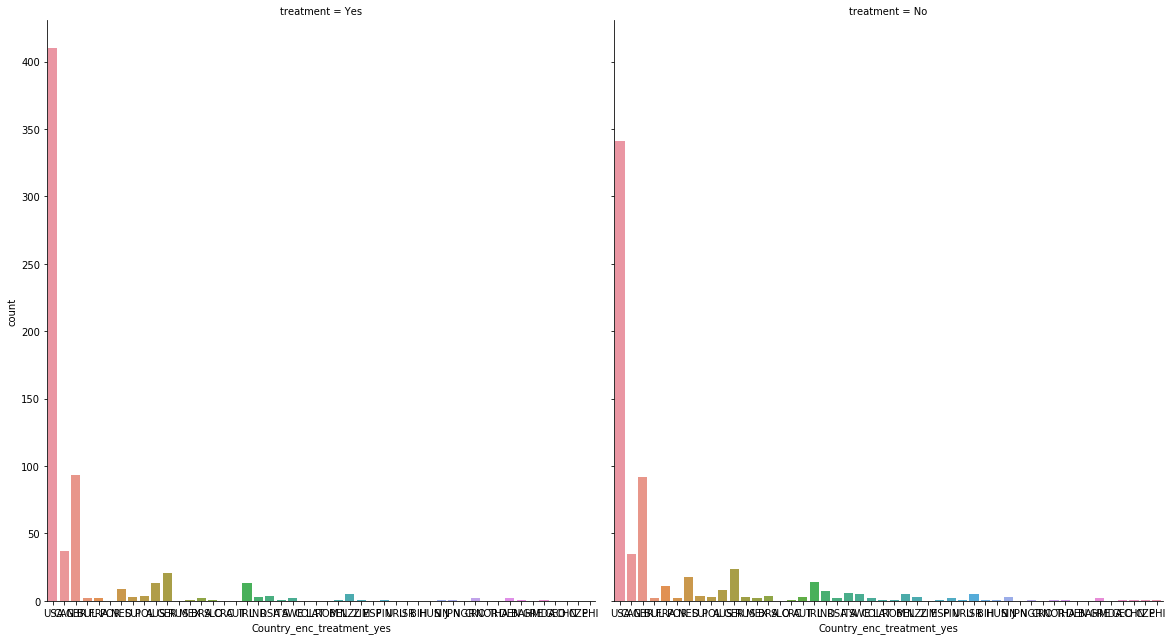

In [39]:
sns.factorplot(df.columns[32], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

In [40]:
df["state_treatment_yes"] = df["state_treatment_no"] = df["state"].copy()
df["state_treatment_yes"] = df["state_treatment_yes"]
df["state_treatment_no"] = df["state_treatment_no"]

In [41]:
df["state_treatment_yes"]

0        IL
1        IN
2       NaN
3       NaN
4        TX
5        TN
6        MI
7       NaN
8        IL
9       NaN
10       OH
11      NaN
12       CA
13       CT
14      NaN
15       IL
16      NaN
17       TN
18       MD
19      NaN
20       NY
21       NC
22       MA
23       IA
24       CA
25       TN
26       TN
27       CA
28       OH
29      NaN
       ... 
1229    NaN
1230    NaN
1231    NaN
1232    NaN
1233    NaN
1234    NaN
1235    NaN
1236     CA
1237    NaN
1238     TN
1239    NaN
1240    NaN
1241    NaN
1242    NaN
1243     FL
1244    NaN
1245    NaN
1246     OR
1247    NaN
1248     WA
1249     CA
1250     CA
1251    NaN
1252     NC
1253     UT
1254    NaN
1255     IL
1256     CA
1257     NC
1258     IL
Name: state_treatment_yes, dtype: object

In [45]:
for index,treatment in enumerate(df["treatment"]):
    if treatment == "Yes":
        del df["state_treatment_yes"][index]
    else:
        del df["state_treatment_no"][index]

c_yes = collections.Counter(df["state_treatment_yes"])
c_no = collections.Counter(df["state_treatment_no"])

KeyError: 0

In [46]:
c_yes

Counter({'AL': 1,
         'AZ': 1,
         'CA': 52,
         'CO': 5,
         'CT': 2,
         'DC': 3,
         'FL': 7,
         'GA': 6,
         'IA': 1,
         'IL': 9,
         'IN': 14,
         'KS': 3,
         'KY': 4,
         'MA': 10,
         'MD': 6,
         'MI': 12,
         'MN': 9,
         'MO': 8,
         'NC': 7,
         'NE': 1,
         'NH': 1,
         'NJ': 3,
         'NM': 2,
         'NV': 1,
         'NY': 27,
         'OH': 10,
         'OK': 4,
         'OR': 12,
         'PA': 15,
         'RI': 1,
         'SC': 3,
         'SD': 2,
         'TN': 27,
         'TX': 19,
         'UT': 4,
         'VA': 8,
         'VT': 3,
         'WA': 29,
         'WI': 3,
         'WV': 1,
         'WY': 1,
         nan: 285})

In [47]:
c_no

Counter({'AL': 7,
         'AZ': 6,
         'CA': 86,
         'CO': 4,
         'CT': 2,
         'DC': 1,
         'FL': 8,
         'GA': 6,
         'IA': 3,
         'ID': 1,
         'IL': 20,
         'IN': 13,
         'KY': 1,
         'LA': 1,
         'MA': 10,
         'MD': 2,
         'ME': 1,
         'MI': 10,
         'MN': 12,
         'MO': 4,
         'MS': 1,
         'NC': 7,
         'NE': 1,
         'NH': 2,
         'NJ': 3,
         'NV': 2,
         'NY': 30,
         'OH': 20,
         'OK': 2,
         'OR': 17,
         'PA': 14,
         'SC': 2,
         'SD': 1,
         'TN': 18,
         'TX': 25,
         'UT': 7,
         'VA': 6,
         'WA': 41,
         'WI': 9,
         'WY': 1,
         nan: 230})

In [48]:
states_yes = list(c_yes.keys())
values_yes = list(c_yes.values())
del states_yes[0]
del values_yes[0]

In [49]:
lgn.map(states_yes, values_yes, colormap='Reds')

In [50]:
states_no = list(c_no.keys())
values_no = list(c_no.values())

del states_no[0]
del values_no[0]

In [51]:
lgn.map(states_no, values_no, colormap='Reds')

In [52]:
df.columns[3]

'state'

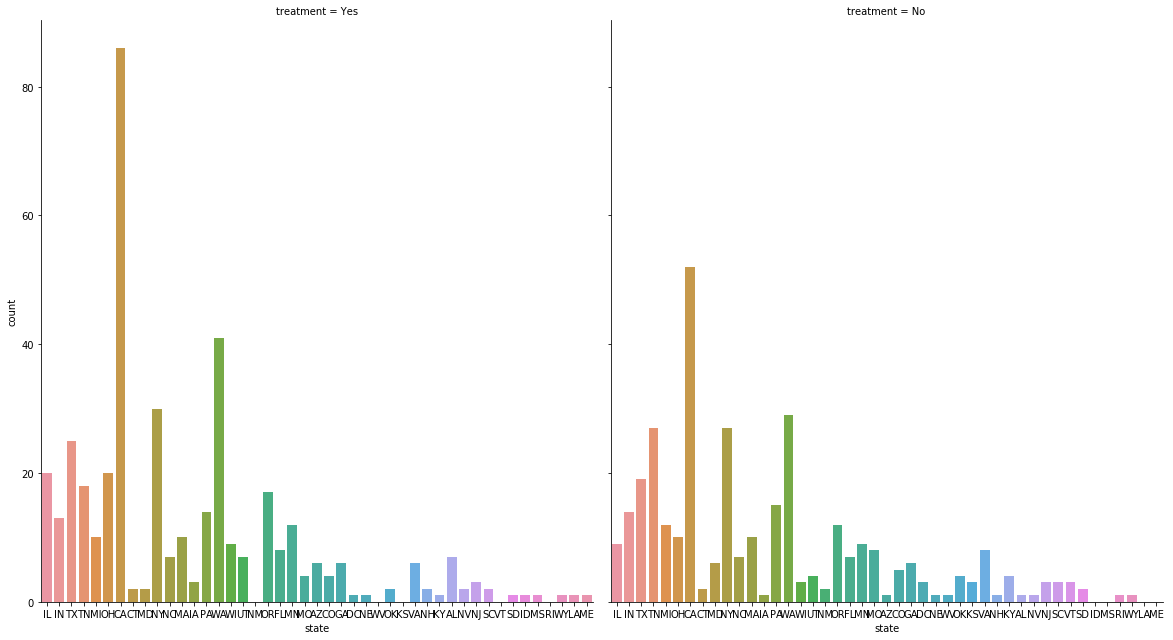

In [53]:
sns.factorplot(df.columns[3], col="treatment", data=df, size=9.0, aspect=.9, kind="count")

以下を有効な変数候補として扱う

* Age:年齢(10歳区切り)
* Gender_enc4:性別(男性・女性・Non-binary)
* Six_continents: 大陸（六大州別）
* state: 州
* family_history
* work_interfere
* no_employees: グラフ化した時に使用しないでおこうかと思ったけど、入れてみる
* benefits
* care_options
* wellness_program
* seek_help
* mental_health_consequence
* coworkers
* mental_vs_physical

In [54]:
df_enc = df.copy()
df_enc.columns

Index(['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comment_flag',
       'comment_length', 'Gender_enc', 'Gender_enc2', 'Gender_enc3',
       'Gender_enc4', 'Country_enc', 'Country_enc_treatment_yes',
       'Country_enc_treatment_no', 'Six_continents', 'state_treatment_yes',
       'state_treatment_no'],
      dtype='object')

In [55]:
# 使用しない変数
unuse_params = [
    'Gender',
    'Country',
    'self_employed',
    'remote_work',
    'tech_company',
    'anonymity',
    'leave',
    'phys_health_consequence',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'obs_consequence',
    'comment_flag',
    'comment_length',
    'Gender_enc',
    'Gender_enc2',
    'Gender_enc3',
    'Country_enc',
    'Country_enc_treatment_yes',
    'Country_enc_treatment_no',
    'state_treatment_yes',
    'state_treatment_no'
]

# 使用しない説明変数を除去する
df_enc = df_enc.drop(unuse_params, axis=1)

In [56]:
df_enc.columns

Index(['Age', 'state', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'mental_health_consequence', 'coworkers',
       'mental_vs_physical', 'Gender_enc4', 'Six_continents'],
      dtype='object')

In [57]:
for col in df_enc.columns:
    print(col + ':\n' + str(df_enc[col].unique().tolist()) + '\n')

Age:
[30, 40, 20, 50, 10, -10, 60, 100, 0, 70]

state:
['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY', 'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN', 'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH', 'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY', 'LA', 'ME']

family_history:
['No', 'Yes']

treatment:
['Yes', 'No']

work_interfere:
['Often', 'Rarely', 'Never', 'Sometimes', nan]

no_employees:
['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000']

benefits:
['Yes', "Don't know", 'No']

care_options:
['Not sure', 'No', 'Yes']

wellness_program:
['No', "Don't know", 'Yes']

seek_help:
['Yes', "Don't know", 'No']

mental_health_consequence:
['No', 'Maybe', 'Yes']

coworkers:
['Some of them', 'No', 'Yes']

mental_vs_physical:
['Yes', "Don't know", 'No']

Gender_enc4:
['Female', 'Male', 'non-binary']

Six_continents:
['NA', 'EU', 'OC', 'SA', 'AS', 'AF']



In [58]:
# Ageは量的データと捉えて、特に何もしない。

In [59]:
# stateはアメリカ以外は欠損値になるので、nothingで埋める
df_enc["state"].fillna("nothing", inplace=True)

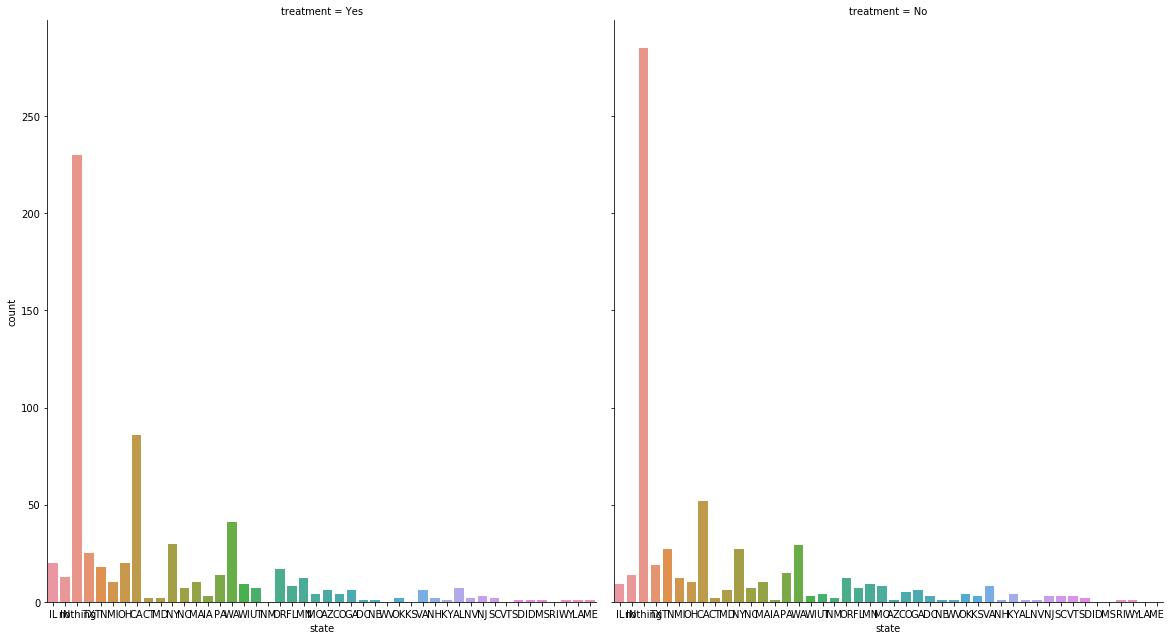

In [60]:
sns.factorplot(df_enc.columns[1], col="treatment", data=df_enc, size=9.0, aspect=.9, kind="count")

In [61]:
# work_interfereも欠損値が264個あり、単純に削除するとデータが大きく減るため、こちらもnothingで埋める
df_enc["work_interfere"].fillna("nothing", inplace=True)

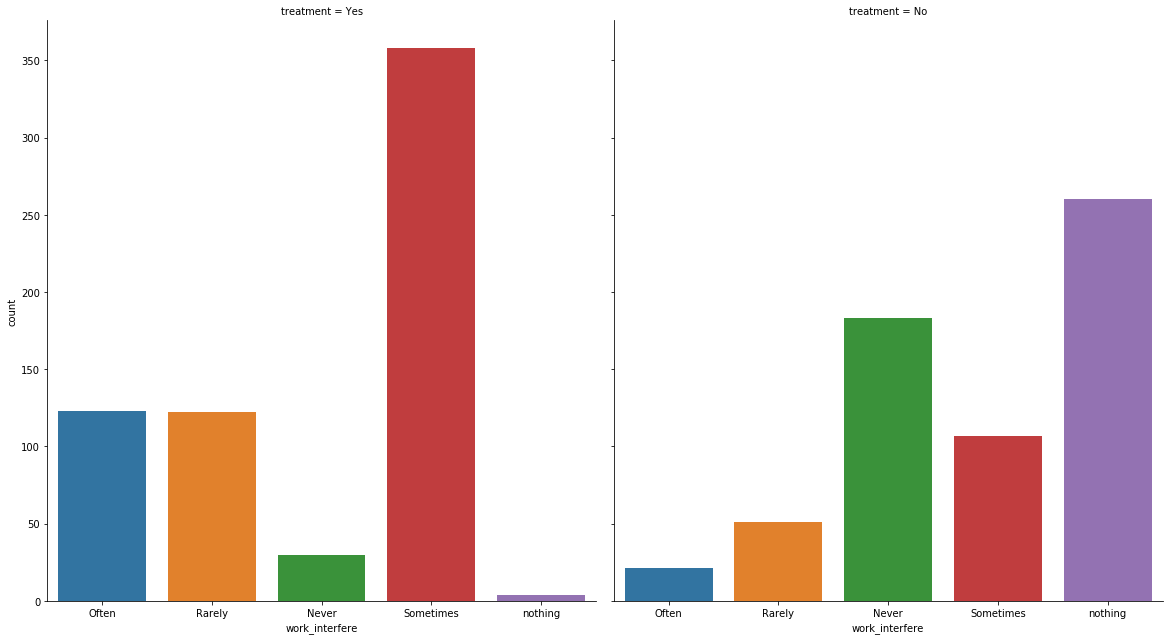

In [62]:
sns.factorplot(df_enc.columns[4], col="treatment", data=df_enc, size=9.0, aspect=.9, kind="count")

In [63]:
for col in df_enc.columns:
    print(col + ':\n' + str(df_enc[col].unique().tolist()) + '\n')

Age:
[30, 40, 20, 50, 10, -10, 60, 100, 0, 70]

state:
['IL', 'IN', 'nothing', 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY', 'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN', 'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH', 'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY', 'LA', 'ME']

family_history:
['No', 'Yes']

treatment:
['Yes', 'No']

work_interfere:
['Often', 'Rarely', 'Never', 'Sometimes', 'nothing']

no_employees:
['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000']

benefits:
['Yes', "Don't know", 'No']

care_options:
['Not sure', 'No', 'Yes']

wellness_program:
['No', "Don't know", 'Yes']

seek_help:
['Yes', "Don't know", 'No']

mental_health_consequence:
['No', 'Maybe', 'Yes']

coworkers:
['Some of them', 'No', 'Yes']

mental_vs_physical:
['Yes', "Don't know", 'No']

Gender_enc4:
['Female', 'Male', 'non-binary']

Six_continents:
['NA', 'EU', 'OC', 'SA', 'AS', 'AF']



In [64]:
# Age以外は質的データのためone-hotエンコーディングでダミー変数化する。treatmentはYes,Noを1,0に変換する
columns = [
    "state",
    "family_history",
    "work_interfere",
    "no_employees",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "mental_health_consequence",
    "coworkers",
    "mental_vs_physical",
    "Gender_enc4",
    "Six_continents",
]

df_enc = pd.concat([df_enc, pd.get_dummies(df_enc[columns])], axis=1)


In [65]:
df_enc = df_enc.drop(columns, axis=1)
df_enc.head()

Age treatment  state_AL  state_AZ  state_CA  state_CO  state_CT  state_DC  \
0   30       Yes         0         0         0         0         0         0   
1   40        No         0         0         0         0         0         0   
2   30        No         0         0         0         0         0         0   
3   30       Yes         0         0         0         0         0         0   
4   30        No         0         0         0         0         0         0   

   state_FL  state_GA        ...          mental_vs_physical_Yes  \
0         0         0        ...                               1   
1         0         0        ...                               0   
2         0         0        ...                               0   
3         0         0        ...                               0   
4         0         0        ...                               0   

   Gender_enc4_Female  Gender_enc4_Male  Gender_enc4_non-binary  \
0                   1                 0                       0   
1                   0                 1                       0   
2                   0                 1                       0   
3                   0                 1                       0   
4                   0                 1                       0   

   Six_continents_AF  Six_continents_AS  Six_continents_EU  Six_continents_NA  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  1   
3                  0                  0                  1                  0   
4                  0                  0                  0                  1   

   Six_continents_OC  Six_continents_SA  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0  

[5 rows x 91 columns]

In [66]:
encode_rule = {
    "Yes": 1,
    "No": 0,
}
columns = [
    "treatment"
]

for col in columns:
    df_enc[col] = df_enc[col].map(encode_rule)

In [67]:
df_enc.corr().style.background_gradient().format('{:.2f}')

In [ ]:
df_enc.corr().to_csv('correlation.csv')

In [68]:
df_enc.columns

Index(['Age', 'treatment', 'state_AL', 'state_AZ', 'state_CA', 'state_CO',
       'state_CT', 'state_DC', 'state_FL', 'state_GA', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_NC', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV',
       'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI',
       'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA',
       'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY',
       'state_nothing', 'family_history_No', 'family_history_Yes',
       'work_interfere_Never', 'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'work_interfere_nothing',
       'no_employees_1-5', 'no_employees_100-500', 'no_employees_26-100',
       'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'benefits_D

In [69]:
df_enc2 = df_enc.copy()

In [71]:
drop_columns= [
    'Six_continents_NA',
    'state_nothing',
    'benefits_Yes',
    'care_options_Yes',
    'wellness_program_No',
    'seek_help_No',
    'mental_health_consequence_Maybe',
    'coworkers_Some of them',
    "mental_vs_physical_Don't know",
    "Gender_enc4_Female",
]

df_enc2 = df_enc2.drop(drop_columns, axis=1)

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
lr = LogisticRegression()

相関係数が高い変数を除去したパターン

In [73]:
X = df_enc2.drop("treatment", axis=1)
y = df_enc2["treatment"]

In [74]:
## トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [75]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp
C_range

array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])

In [78]:
param = {'C': C_range}
gs = GridSearchCV(lr, param)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [79]:
gs.cv_results_

{'mean_fit_time': array([0.24486717, 0.04684655, 0.05694413, 0.04803546, 0.05811564,
        0.05533393, 0.05557791, 0.05359364, 0.05727784, 0.06579177,
        0.06108832, 0.04422371, 0.06416821, 0.06872908, 0.06323878,
        0.06886061, 0.08025805, 0.11005362, 0.11902571, 0.13385471,
        0.13712684, 0.14969913, 0.14506674, 0.15457694, 0.12849768,
        0.16061989, 0.17149305, 0.15982874, 0.14840086, 0.13330404,
        0.1547149 , 0.13836265, 0.13697219, 0.13155842, 0.13591496,
        0.15614287]),
 'mean_score_time': array([0.00979932, 0.01682989, 0.0121119 , 0.01656493, 0.00981641,
        0.01501036, 0.01629353, 0.01152412, 0.01039513, 0.01703779,
        0.0165294 , 0.00951242, 0.00617719, 0.0163122 , 0.01530147,
        0.00965349, 0.01332418, 0.01447757, 0.01189701, 0.00788641,
        0.01029364, 0.0063777 , 0.01031756, 0.00996423, 0.01226219,
        0.00942707, 0.01165883, 0.00837262, 0.00919048, 0.00335987,
        0.01114901, 0.01074195, 0.00937947, 0.00486366, 0.

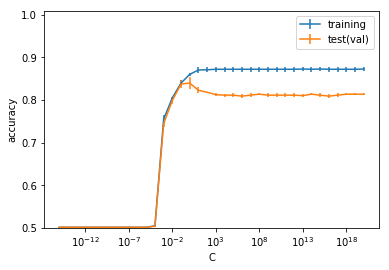

In [80]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_train_score'],
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'],
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.5, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")

In [81]:
gs.best_params_, gs.best_score_, gs.best_estimator_

({'C': 1.0},
 0.8399545970488081,
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [82]:
gs.score(X_test, y_test)

0.8227513227513228

In [83]:
y_pred = gs.predict(X_test)

print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.85      0.76      0.81       182
          1       0.80      0.88      0.84       196

avg / total       0.83      0.82      0.82       378



In [ ]:
相関係数が高い変数を除去しなかったパターン

In [84]:
X2 = df_enc.drop("treatment", axis=1)
y2 = df_enc["treatment"]

## トレーニングデータとテストデータに分割
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=1234)

In [85]:
param = {'C': C_range}
gs2 = GridSearchCV(lr, param)
gs2.fit(X_train2, y_train2)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
gs2.cv_results_

{'mean_fit_time': array([0.04984593, 0.05864318, 0.04815785, 0.04952312, 0.04841105,
        0.03979707, 0.05514979, 0.0524536 , 0.04991794, 0.04543988,
        0.05027525, 0.05012925, 0.04658707, 0.05875174, 0.07203166,
        0.07720033, 0.09809812, 0.12436485, 0.16374723, 0.18465797,
        0.2012314 , 0.18975576, 0.19251339, 0.20059053, 0.19519464,
        0.1940167 , 0.19653042, 0.205568  , 0.19145091, 0.20457538,
        0.19671551, 0.2106808 , 0.19375666, 0.21330309, 0.19947775,
        0.21322648]),
 'mean_score_time': array([0.02567212, 0.01011976, 0.01418455, 0.0130713 , 0.01568921,
        0.00824316, 0.01108368, 0.01473228, 0.01416278, 0.01195868,
        0.01429407, 0.01056274, 0.02135579, 0.01710153, 0.01291585,
        0.01208353, 0.01048366, 0.01137964, 0.01042461, 0.01124207,
        0.00944599, 0.00953237, 0.00685652, 0.01541408, 0.00874464,
        0.00755819, 0.0112381 , 0.0077529 , 0.00292214, 0.00723235,
        0.01103846, 0.00153677, 0.01203489, 0.0090909 , 0.

In [87]:
gs2.best_params_, gs2.best_score_, gs2.best_estimator_

({'C': 0.1},
 0.8354143019296254,
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False))

In [88]:
y_pred2 = gs2.predict(X_test2)

print(classification_report(y_test2,y_pred2))

             precision    recall  f1-score   support

          0       0.85      0.78      0.81       182
          1       0.81      0.87      0.84       196

avg / total       0.83      0.83      0.83       378



In [89]:
!pip install pydotplus

    100% |████████████████████████████████| 286kB 2.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
azure-cli-interactive 0.3.24 has requirement six~=1.11.0, but you'll have six 1.10.0 which is incompatible.
msrest 0.5.4 has requirement requests~=2.16, but you'll have requests 2.14.2 which is incompatible.
pyasn1-modules 0.2.2 has requirement pyasn1<0.5.0,>=0.4.1, but you'll have pyasn1 0.1.9 which is incompatible.


In [90]:
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [91]:
dt_params = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [3,5,7,10,20,50,100,200,500],
    'min_samples_leaf': [3,5,7,10,20,50,100,200,500]
}
dt_gs = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_params,cv=5)
dt_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_samples_split': [3, 5, 7, 10, 20, 50, 100, 200, 500], 'min_samples_leaf': [3, 5, 7, 10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [92]:
dt_gs.best_params_, dt_gs.best_score_, dt_gs.best_estimator_

({'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3},
 0.8320090805902384,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'))

In [93]:
dt_gs.score(X_test, y_test)

0.828042328042328

In [94]:
y_pred_dt = dt_gs.predict(X_test)

print(classification_report(y_test,y_pred_dt))

             precision    recall  f1-score   support

          0       0.91      0.71      0.80       182
          1       0.78      0.93      0.85       196

avg / total       0.84      0.83      0.83       378



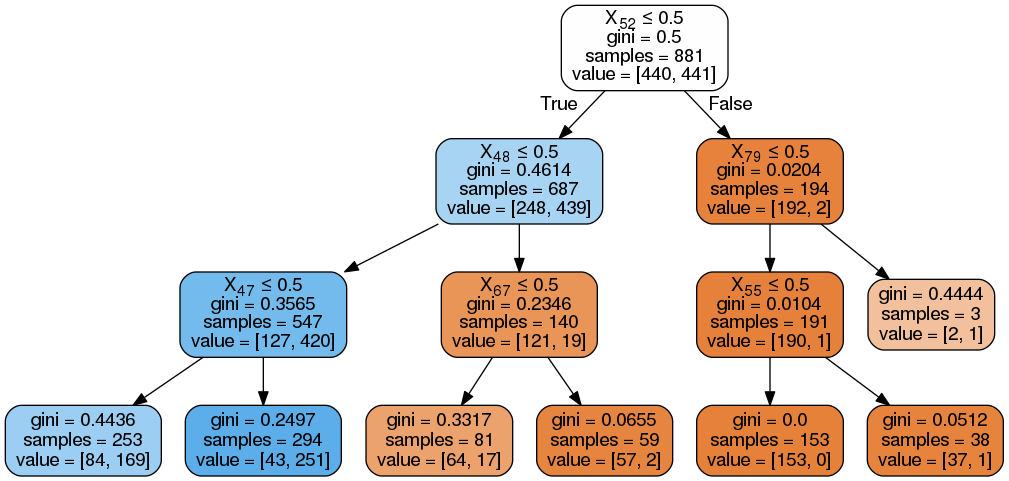

In [95]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(dt_gs.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [96]:
## 決定木が重要とみなした説明変数
dt = dt_gs.best_estimator_
print(dt.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.24923550e-02
 4.03350595e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 5.41513393e-01 0.00000000e+00 0.00000000e+00 1.90903078e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

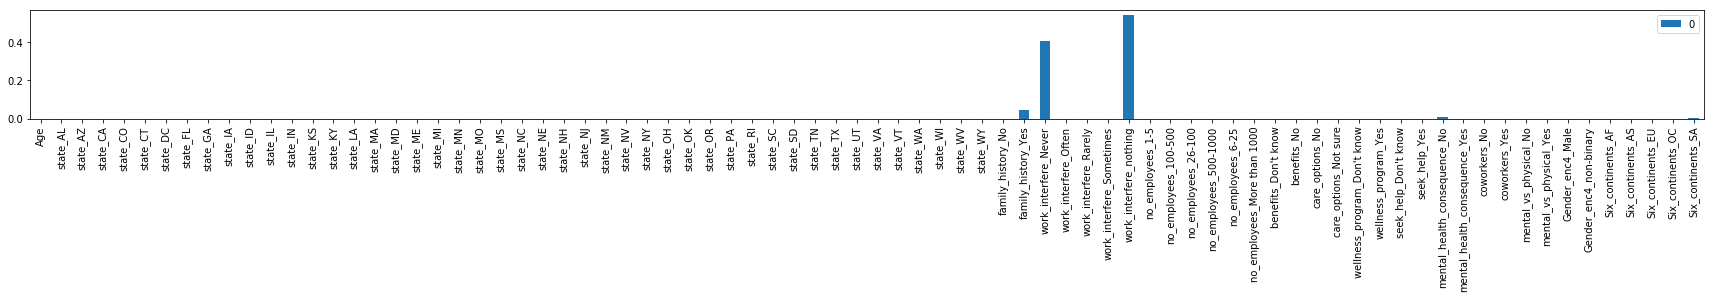

In [97]:
## 決定木が重要とみなした説明変数
pd.DataFrame(dt.feature_importances_, index=[X.keys()]).plot.bar(figsize=(30,2))

In [98]:
dt_params = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [3,5,7,10,20,50,100,200,500],
    'min_samples_leaf': [3,5,7,10,20,50,100,200,500]
}
dt_gs2 = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_params,cv=5)
dt_gs2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 10], 'min_samples_split': [3, 5, 7, 10, 20, 50, 100, 200, 500], 'min_samples_leaf': [3, 5, 7, 10, 20, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [99]:
dt_gs2.best_params_, dt_gs2.best_score_, dt_gs2.best_estimator_

({'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 3},
 0.8320090805902384,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'))

In [100]:
dt_gs2.score(X_test2, y_test2)

0.828042328042328

In [102]:
y_pred_dt2 = dt_gs2.predict(X_test2)

print(classification_report(y_test2,y_pred_dt2))

             precision    recall  f1-score   support

          0       0.91      0.71      0.80       182
          1       0.78      0.93      0.85       196

avg / total       0.84      0.83      0.83       378



ランダムフォレストを試す

In [103]:
## ランダムフォレストでモデルを構築する
from sklearn.ensemble import RandomForestClassifier

In [109]:
#rf_params = {
#    'n_estimators':[3,5,7,10,12,15,20,25,30,35,40],
#    'max_depth': [3,5,7,10],
#    'min_samples_split': [3,5,7,10,20,50,100,200,500],
#    'min_samples_leaf': [3,5,7,10,20,50,100,200,500]
#}
rf_params = {
    'n_estimators':[15,20,25,30,35,40],
    'max_depth': [5,7,10],
    'min_samples_split': [3,5,7,10,20,50,100,200],
    'min_samples_leaf': [3,5,7,10,20,50,100,200]
}
rf_gs = GridSearchCV(RandomForestClassifier(),param_grid=rf_params,cv=5)
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [15, 20, 25, 30, 35, 40], 'max_depth': [5, 7, 10], 'min_samples_split': [3, 5, 7, 10, 20, 50, 100, 200], 'min_samples_leaf': [3, 5, 7, 10, 20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [106]:
rf_gs.best_params_, rf_gs.best_score_, rf_gs.best_estimator_

({'max_depth': 7, 'n_estimators': 40},
 0.8320090805902384,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=7, max_features='auto', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=40, n_jobs=1, oob_score=False, random_state=None,
             verbose=0, warm_start=False))

In [107]:
rf_gs.score(X_test, y_test)

0.8412698412698413

In [108]:
y_pred_rf = rf_gs.predict(X_test)

print(classification_report(y_test,y_pred_rf))

             precision    recall  f1-score   support

          0       0.87      0.79      0.83       182
          1       0.82      0.89      0.85       196

avg / total       0.84      0.84      0.84       378



In [ ]:
col = "Gender2"
df_gender = pd.crosstab(index=df["treatment"], columns=df[col], margins=True)
display(df_gender)

In [ ]:
# ageの外れ値
df.isnull().sum()

In [ ]:
df = df[(df["Age"]>=0) & (df["Age"] <= 100)]

In [ ]:
def name_identification(df, columns):
    for col in columns:
        df[col] = df[col].replace("Don't know", "No")
    return df

columns = ["mental_vs_physical", "anonymity", "seek_help", "wellness_program", "benefits"]

df = name_identification(df, columns)

In [ ]:
df["self_employed"].fillna("No", inplace=True)

In [ ]:
df["work_interfere"].fillna("Never", inplace=True)

In [ ]:
df["care_options"] = df["care_options"].replace("Not sure", "No")

In [ ]:
df["state"].fillna("nothing", inplace=True)

In [ ]:
df["comment_flag"] = df["comments"].map(lambda x:1 if not pd.isnull(x) else 0)

In [ ]:
for col in df.columns:
    if col == 'Timestamp' or col == 'comments' :
        continue;
    print(col + ':\n' + str(df[col].unique().tolist()) + '\n')


In [ ]:
df.isnull().sum()

In [ ]:
encode_rule = {
    "Yes": 1,
    "No": 0,
}
columns = [
    "self_employed",
    "family_history",
    "treatment",
    "remote_work",
    "tech_company",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "mental_vs_physical",
    "obs_consequence",
]

for col in columns:
    df[col] = df[col].map(encode_rule)

In [ ]:
df.head()

In [ ]:
columns = [
    "Gender2",
    "Country",
    "state",
    "work_interfere",
    "no_employees",
    "leave",
    "mental_health_consequence",
    "phys_health_consequence",
    "coworkers",
    "supervisor",
    "mental_health_interview",
    "phys_health_interview",
]

df = pd.concat([df, pd.get_dummies(df[columns])], axis=1)
df = df.drop(columns, axis=1)
df = df.drop(['Gender', 'comments', 'Timestamp'], axis=1)
df.head()

In [ ]:
#df.corr().style.background_gradient().format('{:.2f}')

In [ ]:
X = df.drop("treatment", axis=1)
y = df["treatment"]

In [ ]:
lr = LogisticRegression()

lr.fit(X,y)

print(lr.coef_,lr.intercept_)
y_pred = lr.predict(X)

print(classification_report(y,y_pred))

In [ ]:
########## DAY2

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
## トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
## DAY1でモデルとして作成したロジスティック回帰をトレーニングデータで学習させ、テストデータで予測しなおす
lr.fit(X_train,y_train)

print(lr.coef_,lr.intercept_)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,lr.predict(X_test)))

In [ ]:
C_range_exp = np.arange(-15.0, 21.0)
C_range = 10 ** C_range_exp
C_range

In [ ]:
param = {'C': C_range}
gs = GridSearchCV(lr, param)
gs.fit(X_train, y_train)

In [ ]:
gs.cv_results_

In [ ]:
plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_train_score'],
             yerr=gs.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs.cv_results_['param_C'].data,
             gs.cv_results_['mean_test_score'],
             yerr=gs.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(.5, 1.01)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend(loc="best")

In [ ]:
gs.best_params_, gs.best_score_, gs.best_estimator_

In [ ]:
gs.score(X_test, y_test)

In [ ]:
y_pred = gs.predict(X_test)

print(classification_report(y_test,y_pred))

In [ ]:
# 正則化パラメータがデフォルトのときとベストパラメータのときで結果はあまり変化せず。

In [ ]:
!pip install pydotplus

In [ ]:
import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
dt_params = {
    'max_depth': [3,5,7,10],
    'min_samples_split': [3,5,7,10,20,50,100,200,500],
    'min_samples_leaf': [3,5,7,10,20,50,100,200,500]
}
dt_gs = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_params,cv=5)
dt_gs.fit(X_train, y_train)

In [ ]:
dt_gs.best_params_, dt_gs.best_score_, dt_gs.best_estimator_

In [ ]:
dt_gs.score(X_test, y_test)

In [ ]:
y_pred_dt = dt_gs.predict(X_test)

print(classification_report(y_test,y_pred_dt))

In [ ]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(dt_gs.best_estimator_, out_file=dot_data,  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [ ]:
## 決定木が重要とみなした説明変数
dt = dt_gs.best_estimator_
print(dt.feature_importances_)

In [ ]:
## 決定木が重要とみなした説明変数
pd.DataFrame(dt.feature_importances_, index=[X.keys()]).plot.bar(figsize=(30,2))

In [ ]:
## ランダムフォレストでモデルを構築する
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_params = {
    'n_estimators':[3,5,7,10,12,15,20,25,30,35,40],
}
rf_gs = GridSearchCV(RandomForestClassifier(max_depth=7, min_samples_split=20, min_samples_leaf=3),param_grid=rf_params,cv=5)
rf_gs.fit(X_train, y_train)

In [ ]:
rf_gs.best_params_, rf_gs.best_score_, rf_gs.best_estimator_

In [ ]:
rf_gs.score(X_test, y_test)

In [ ]:
y_pred_rf = rf_gs.predict(X_test)

print(classification_report(y_test,y_pred_rf))

In [ ]:
## ランダムフォレストの説明変数重要度
rf = rf_gs.best_estimator_
print(rf.feature_importances_)

In [ ]:
pd.DataFrame(rf.feature_importances_, index=[X.keys()]).plot.bar(figsize=(30,2))

In [ ]:
for i, feat in enumerate(X):
    if rf.feature_importances_[i] > 0.010000:
      print('\t{0:20s} : {1:>.6f}'.format(feat, rf.feature_importances_[i]))